In [4]:
from astropy.table import Table
from astropy.io import fits
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.patches as patches
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direction': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': 'in','ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
Mass = Table.read(fits.open('catalogs/hlsp_candels_hst_wfc3_egs_v1_mass_cat.fits')[1], format = 'fits').to_pandas()
Photz = Table.read(fits.open('catalogs/hlsp_candels_hst_wfc3_egs_v1_photoz_cat.fits')[1], format = 'fits').to_pandas()
Physpar = Table.read(fits.open('catalogs/hlsp_candels_hst_wfc3_egs_v1_physpar_cat.fits')[1], format = 'fits').to_pandas()
Cat = Table.read(fits.open('catalogs/hlsp_candels_hst_wfc3_egs-tot-multiband_f160w_v1_cat.fits')[1], format = 'fits').to_pandas()

In [6]:
uvjDF = pd.DataFrame({'id' : Cat['ID'] ,'ra' : Cat['RA'],'dec' : Cat['DEC'], 'photz' : Photz['Photo_z_Median'],
                      'u' : Physpar['UMag_6a_deltau'] ,'v' : Physpar['VMag_6a_deltau']  ,'j' : Physpar['JMag_6a_deltau'],
                      'u-v' : Physpar['UMag_6a_deltau'] - Physpar['VMag_6a_deltau'] ,
                      'v-j': Physpar['VMag_6a_deltau'] - Physpar['JMag_6a_deltau'],
                      'class_star' : Cat['CLASS_STAR'],'ssfr' : Physpar['SFR_6a_deltau'] / 10**Mass['M_med'],
                      'lmass' : Mass['M_med'] ,
                      'f125' : Cat['WFC3_F125W_FLUX'],'f140' : Cat['WFC3_F140W_FLUX'],'f160' : Cat['WFC3_F160W_FLUX'],
                        'irac_1': Cat['IRAC_CH1_FLUX'],'irac_2': Cat['IRAC_CH2_FLUX'] })


In [7]:
uvjDF = uvjDF[uvjDF.class_star < 0.8]
uvjDF = uvjDF[uvjDF.lmass > 10.0 ]
uvjDF = uvjDF[uvjDF.photz > 1.5 ]

qsflag = np.repeat('s',repeats=len(uvjDF.index))

for i in range(len(qsflag)):
    if uvjDF['u-v'].values[i]>=0.88*uvjDF['v-j'].values[i]+0.59 and uvjDF['u-v'].values[i]>1.382 and uvjDF['v-j'].values[i]<1.65:
        qsflag[i] = 'q'
        
uvjDF['SF'] = qsflag
qDF = uvjDF[uvjDF.SF == 'q']
sDF = uvjDF[uvjDF.SF == 's']

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


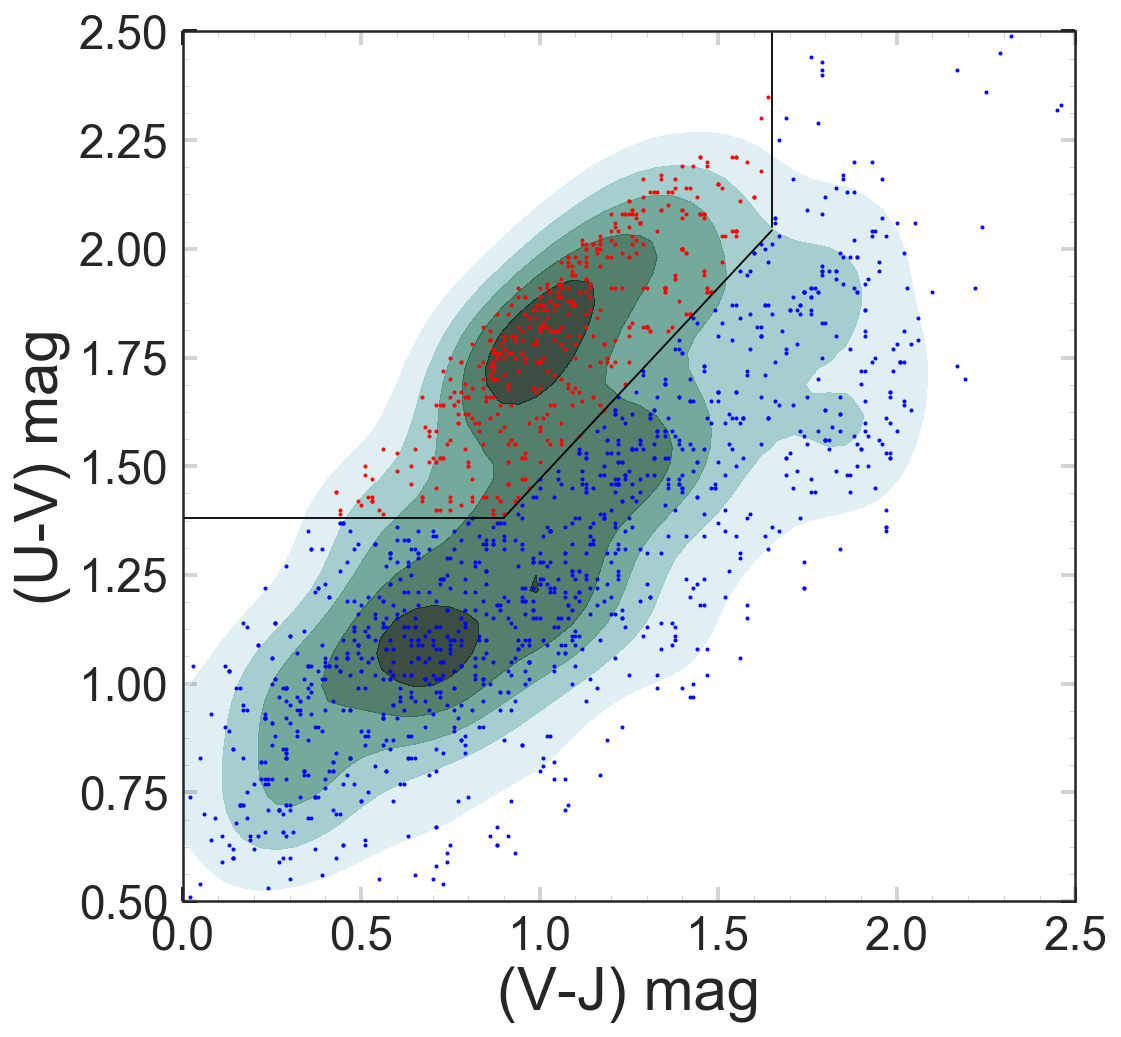

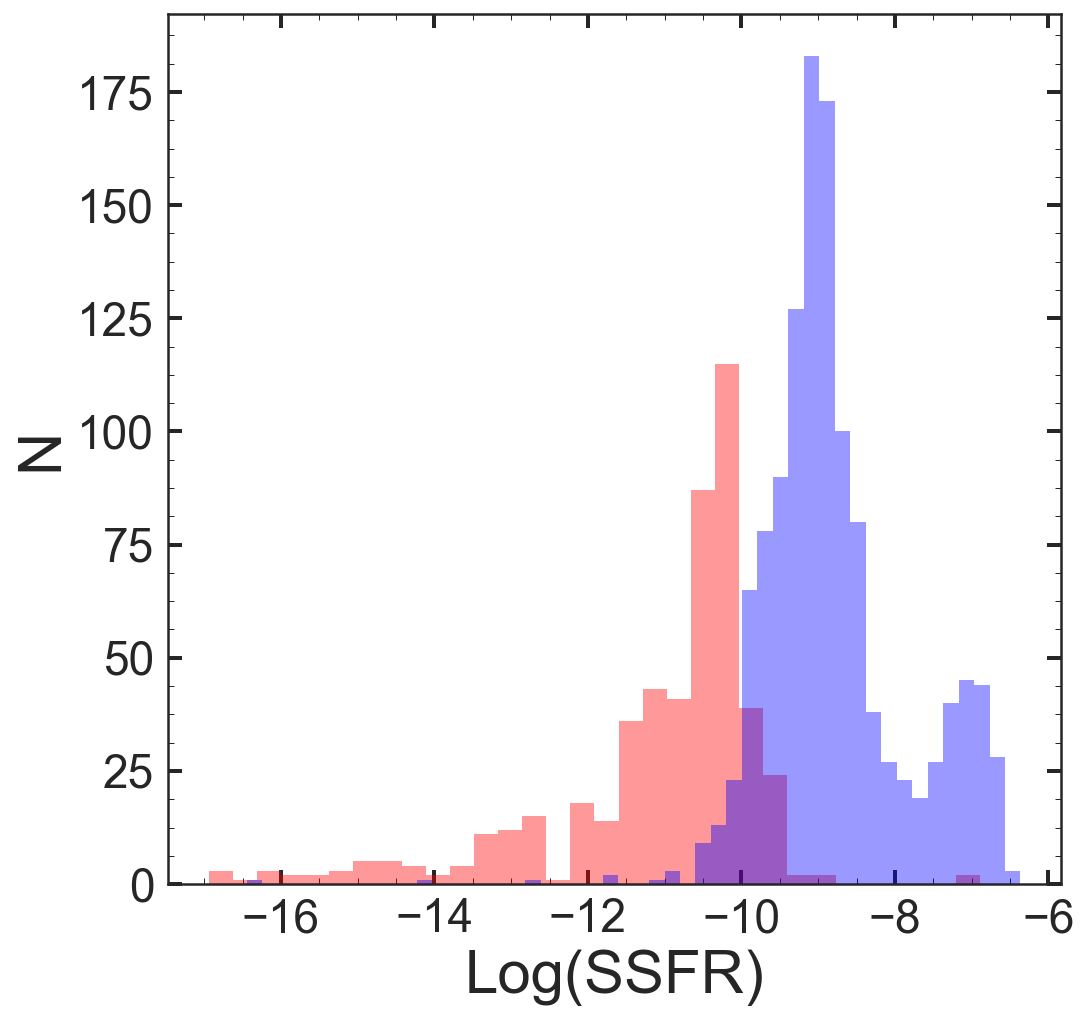

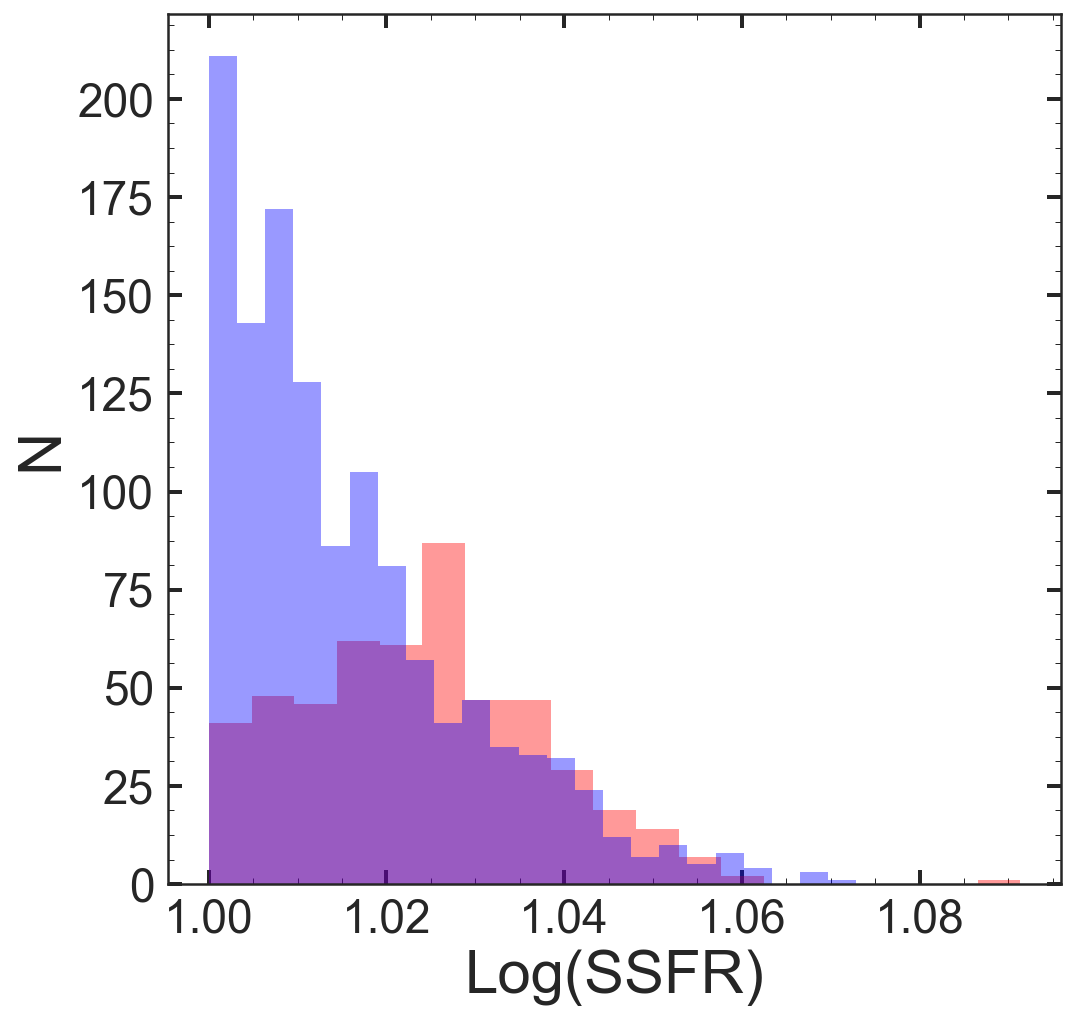

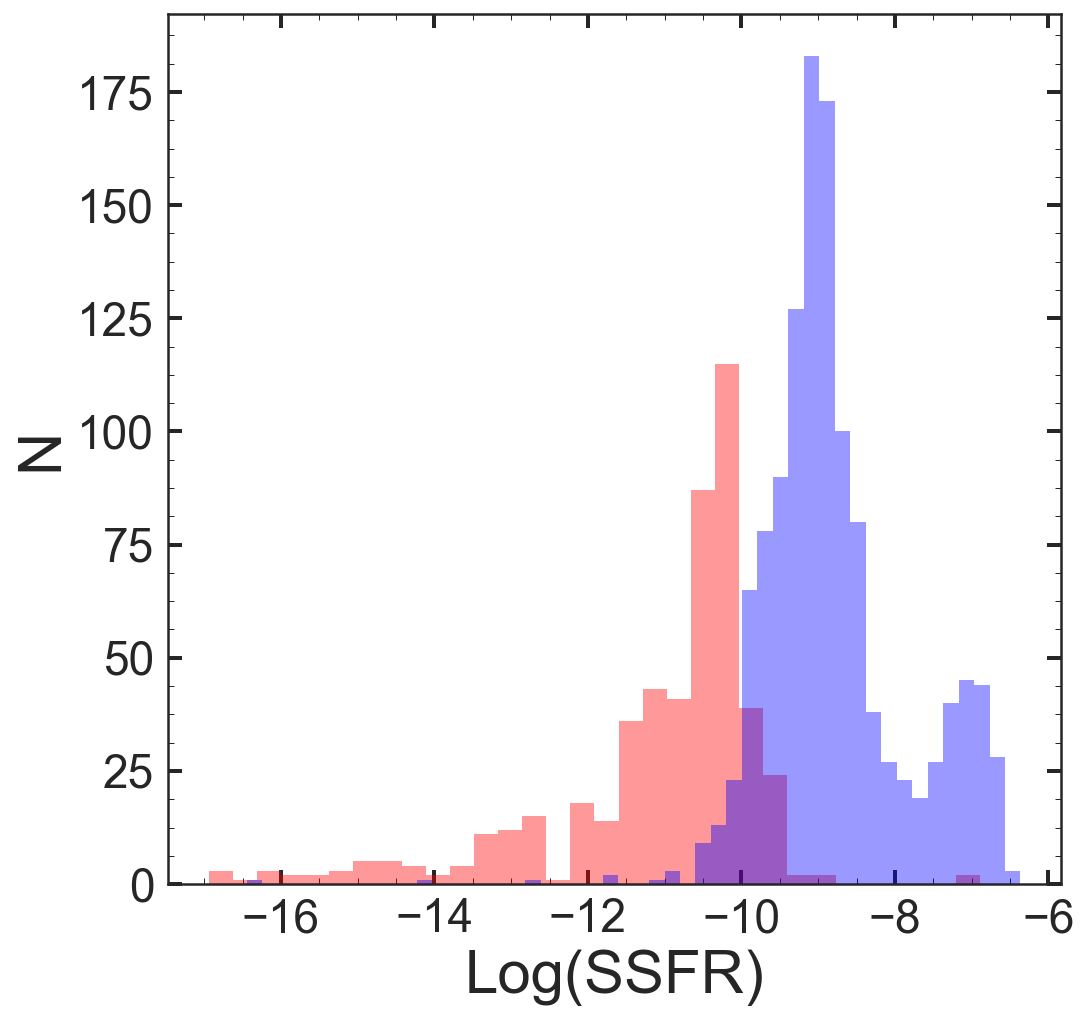

In [8]:
plt.figure(figsize=[8,8])
sea.kdeplot(uvjDF['v-j'],uvjDF['u-v'],n_levels = 7,alpha = .8,shade=True,cmap=cmap,kernel= 'epa',zorder=1)
plt.plot(qDF['v-j'],qDF['u-v'],'ro',ms=2)
plt.plot(sDF['v-j'],sDF['u-v'],'bo',ms=2)
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.xlabel('(V-J) mag',fontsize=30)
plt.ylabel('(U-V) mag',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.savefig('uvj.png',bbox_inches='tight')

plt.figure(figsize=[8,8])
sea.distplot(np.log10(qDF['ssfr'].values)[np.log10(qDF['ssfr'].values) > -100],color='r',norm_hist=False,kde=False)
sea.distplot(np.log10(sDF['ssfr'].values)[np.log10(sDF['ssfr'].values) > -100],color='b',norm_hist=False,kde=False)
plt.xlabel('Log(SSFR)',fontsize=30)
plt.ylabel('N',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.savefig('ssfr.png',bbox_inches='tight')

plt.figure(figsize=[8,8])
sea.distplot(np.log10(qDF['lmass'].values)[np.log10(qDF['lmass'].values) > -100],color='r',norm_hist=False,kde=False)
sea.distplot(np.log10(sDF['lmass'].values)[np.log10(sDF['lmass'].values) > -100],color='b',norm_hist=False,kde=False)
plt.xlabel('Log(SSFR)',fontsize=30)
plt.ylabel('N',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.savefig('ssfr.png',bbox_inches='tight')

plt.figure(figsize=[8,8])
sea.distplot(np.log10(qDF['ssfr'].values)[np.log10(qDF['ssfr'].values) > -100],color='r',norm_hist=False,kde=False)
sea.distplot(np.log10(sDF['ssfr'].values)[np.log10(sDF['ssfr'].values) > -100],color='b',norm_hist=False,kde=False)
plt.xlabel('Log(SSFR)',fontsize=30)
plt.ylabel('N',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.savefig('ssfr.png',bbox_inches='tight') 

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


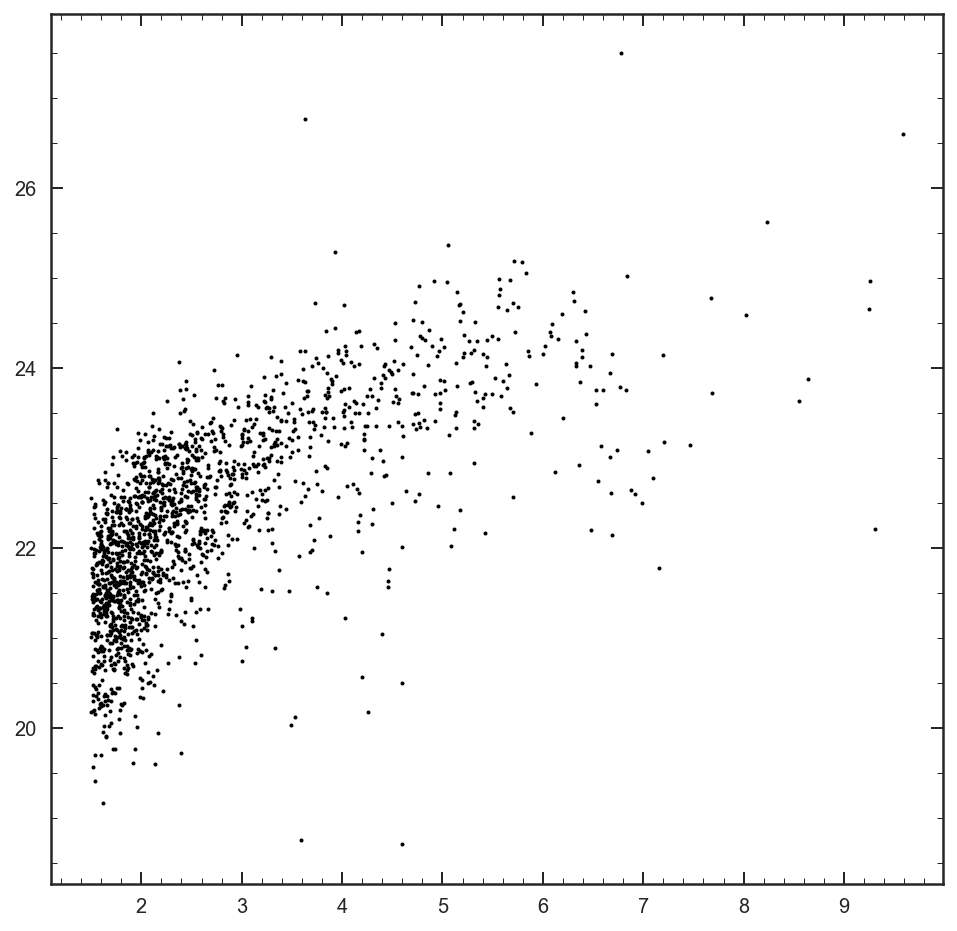

In [11]:
plt.figure(figsize=[8,8])
plt.plot(uvjDF['photz'], -2.5*np.log10(uvjDF['irac_1']*1E-29) - 48.6,'ko',ms=2)

In [12]:
def ra_dec_convert(ra,dec):
    # ra - [hours,minutes,seconds]
    # dec - [degrees,arcminutes,arcseconds]
    
    RA = 15*(ra[0]+ ra[1]/60. + ra[2]/60./60.) 
    DEC = dec[0] + dec[1]/60. + dec[2]/60./60.

    return RA,DEC

In [14]:
hsm_ra_dec = np.array([[[14,20,26.54], [52,57,15.7]],
              [[14,20,09.36], [52,57,34.0]],
              [[14,20,04.32], [52,53,30.4]],
              [[14,19,47.04], [52,53,45.4]]])
              
P = []
for i in range(len(hsm_ra_dec)):
    ra,dec = ra_dec_convert(hsm_ra_dec[i][0],hsm_ra_dec[i][1])
    P.append([ra,dec])

C =np.pi / 180.
alpha = 49.
theta = 90. - alpha
d=129./60/60
c=43./60/60

bR = - (d + c/2) * np.array([np.cos(theta*C),np.sin(theta*C)])
X = (d/2) * np.array([-np.cos(alpha*C),np.sin(alpha*C)])
tR = (c/2) * np.array([np.cos(theta*C),np.sin(theta*C)])

sPb = P + bR + X
tPb = P + tR + X

In [15]:
box = [[[14,19,58.51], [52,50,53.0]], [[14,20,08.04], [52,52,31.0]], [[14,19,57.06], [52,53,54.6]], [[14,19,47.84], [52,52,17.9]],
[[14,19,41.22], [52,51,08.2]], [[14,19,50.74], [52,52,47.0]], [[14,19,39.68], [52,54,10.5]], [[14,19,30.46], [52,52,34.4]],
[[14,20,11.46], [52,53,03.5]], [[14,20,20.86], [52,54,42.7]], [[14,20,10.03], [52,56,05.0]], [[14,20,00.71], [52,54,29.1]],
[[14,19,54.16], [52,53,18.8]], [[14,20,03.47], [52,54,58.1]], [[14,19,52.63], [52,56,21.7]], [[14,19,43.32], [52,54,45.6]],
[[14,20,20.63], [52,54,38.0]], [[14,20,30.26], [52,56,16.6]], [[14,20,19.28], [52,57,40.9]], [[14,20,10.10], [52,56,05.0]],
[[14,20,03.32], [52,54,56.1]], [[14,20,12.86], [52,56,34.8]], [[14,20,01.95], [52,57,58.3]], [[14,19,52.63], [52,56,21.7]],
[[14,20,33.62], [52,56,49.6]], [[14,20,43.04], [52,58,27.5]], [[14,20,32.06], [52,59,51.2]], [[14,20,22.87], [52,58,16.1]],
[[14,20,16.30], [52,57,07.2]], [[14,20,25.78], [52,58,46.4]], [[14,20,14.79], [53,0,09.4]], [[14,20,05.60], [52,58,33.5]]]

In [16]:
BOX = []
for i in range(len(box)):
    ra,dec = ra_dec_convert(box[i][0],box[i][1])
    BOX.append([ra,dec])

In [21]:
q_inout = np.repeat('out',len(qDF.index))
s_inout = np.repeat('out',len(sDF.index))
for i in range(8):
    param1 = np.polyfit([BOX[0 + i*4][0],BOX[1 + i*4][0]],[BOX[0 + i*4][1],BOX[1 + i*4][1]],1)
    param2 = np.polyfit([BOX[1 + i*4][0],BOX[2 + i*4][0]],[BOX[1 + i*4][1],BOX[2 + i*4][1]],1)
    param3 = np.polyfit([BOX[2 + i*4][0],BOX[3 + i*4][0]],[BOX[2 + i*4][1],BOX[3 + i*4][1]],1)
    param4 = np.polyfit([BOX[3 + i*4][0],BOX[0 + i*4][0]],[BOX[3 + i*4][1],BOX[0 + i*4][1]],1)

    for ii in range(len(qDF.index)):
        if qDF['dec'].values[ii] > param1[0]*qDF['ra'].values[ii] + param1[1] \
        and qDF['dec'].values[ii] < param2[0]*qDF['ra'].values[ii] + param2[1] \
        and qDF['dec'].values[ii] < param3[0]*qDF['ra'].values[ii] + param3[1] \
        and qDF['dec'].values[ii] > param4[0]*qDF['ra'].values[ii] + param4[1]:
            q_inout[ii] = 'in'
            
    for ii in range(len(sDF.index)):
        if sDF['dec'].values[ii] > param1[0]*sDF['ra'].values[ii] + param1[1] \
        and sDF['dec'].values[ii] < param2[0]*sDF['ra'].values[ii] + param2[1] \
        and sDF['dec'].values[ii] < param3[0]*sDF['ra'].values[ii] + param3[1] \
        and sDF['dec'].values[ii] > param4[0]*sDF['ra'].values[ii] + param4[1]:
            s_inout[ii] = 'in'

In [22]:
qDF['inout'] = q_inout
sDF['inout'] = s_inout

sampleDF = qDF[qDF.inout == 'in']
sf_sampleDF = sDF[sDF.inout == 'in']

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


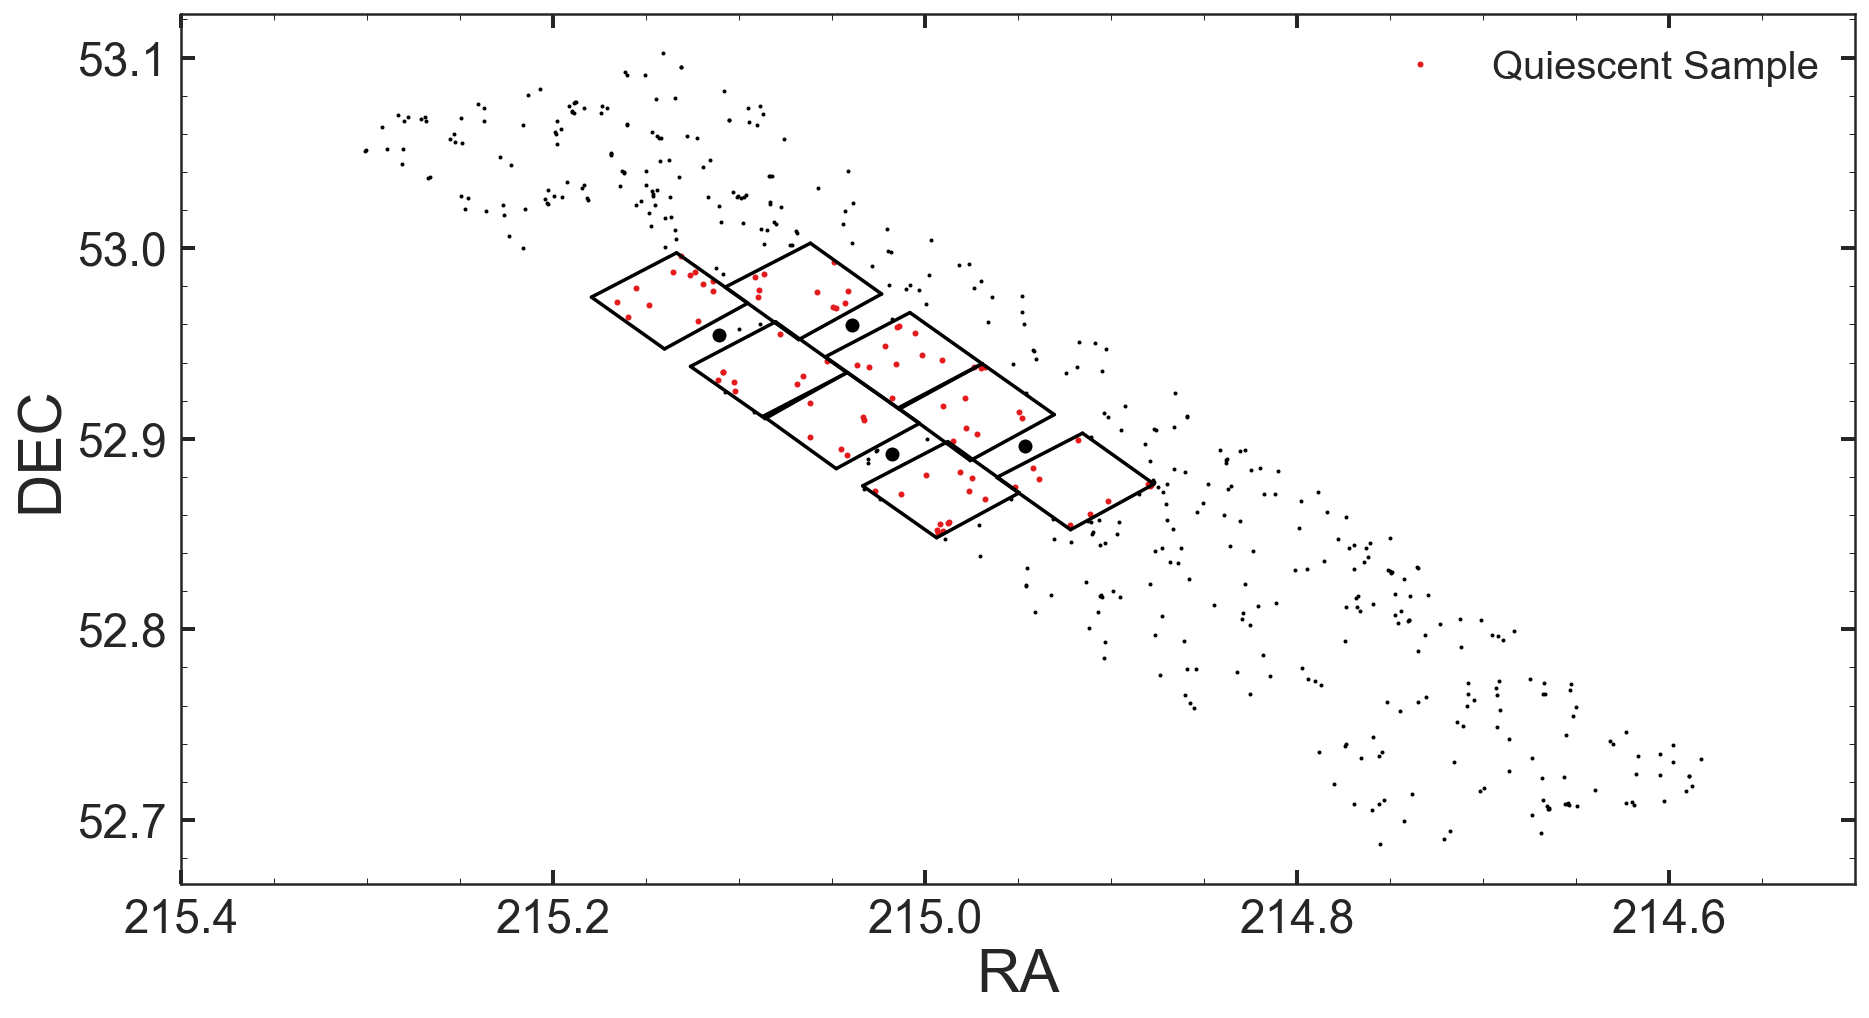

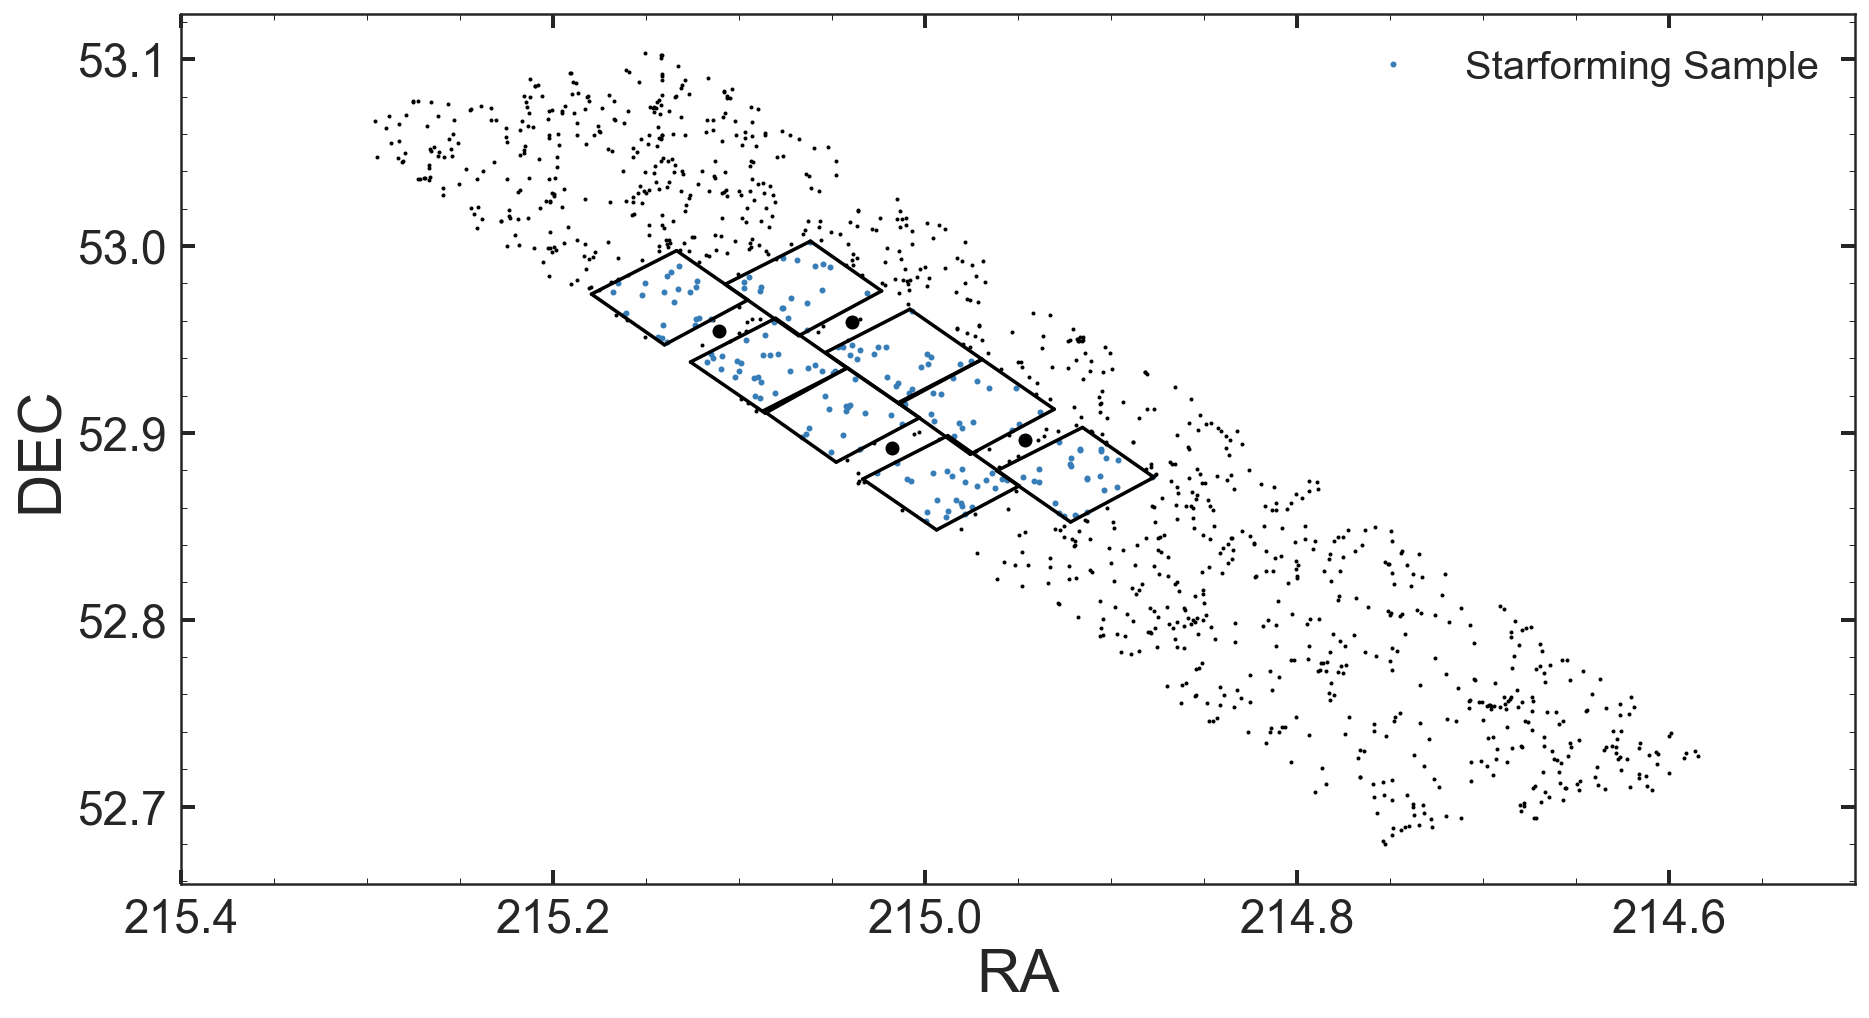

In [23]:
fig2 = plt.figure(figsize=[15,8])
ax2 = fig2.add_subplot(111)#,aspect='equal')
plt.plot(qDF['ra'].values, qDF['dec'].values ,'ko',ms=2)
plt.plot(sampleDF['ra'], sampleDF['dec'] ,'o',color='#e41a1c',ms=3,label='Quiescent Sample')

for i in range(len(P)):
    plt.plot(P[i][0],P[i][1],'ko')

u=1
for i in range(len(BOX)):
    if u == 4:
        plt.plot([BOX[i][0],BOX[i-3][0]],[BOX[i][1],BOX[i-3][1]],'k')
        u=1
    else:
        plt.plot([BOX[i][0],BOX[i+1][0]],[BOX[i][1],BOX[i+1][1]],'k')
        u+=1

plt.xlabel('RA',fontsize=30)
plt.ylabel('DEC',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
plt.xlim(215.4,214.5)
plt.savefig('field.png',bbox_inches='tight') 

#####################################################

fig2 = plt.figure(figsize=[15,8])
ax2 = fig2.add_subplot(111)#,aspect='equal')
plt.plot(sDF['ra'].values, sDF['dec'].values ,'ko',ms=2)
plt.plot(sf_sampleDF['ra'], sf_sampleDF['dec'] ,'o',color='#377eb8',ms=3,label='Starforming Sample')

for i in range(len(P)):
    plt.plot(P[i][0],P[i][1],'ko')

u=1
for i in range(len(BOX)):
    if u == 4:
        plt.plot([BOX[i][0],BOX[i-3][0]],[BOX[i][1],BOX[i-3][1]],'k')
        u=1
    else:
        plt.plot([BOX[i][0],BOX[i+1][0]],[BOX[i][1],BOX[i+1][1]],'k')
        u+=1

plt.xlabel('RA',fontsize=30)
plt.ylabel('DEC',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.xlim(215.4,214.5)
plt.legend(fontsize=20)
plt.savefig('sf_field.png',bbox_inches='tight')

In [26]:
wv,fl = np.load('/Users/vestrada/fsps_models_for_fit/fsps_spec/m0.019_a2.0_dt8.0_spec.npy')

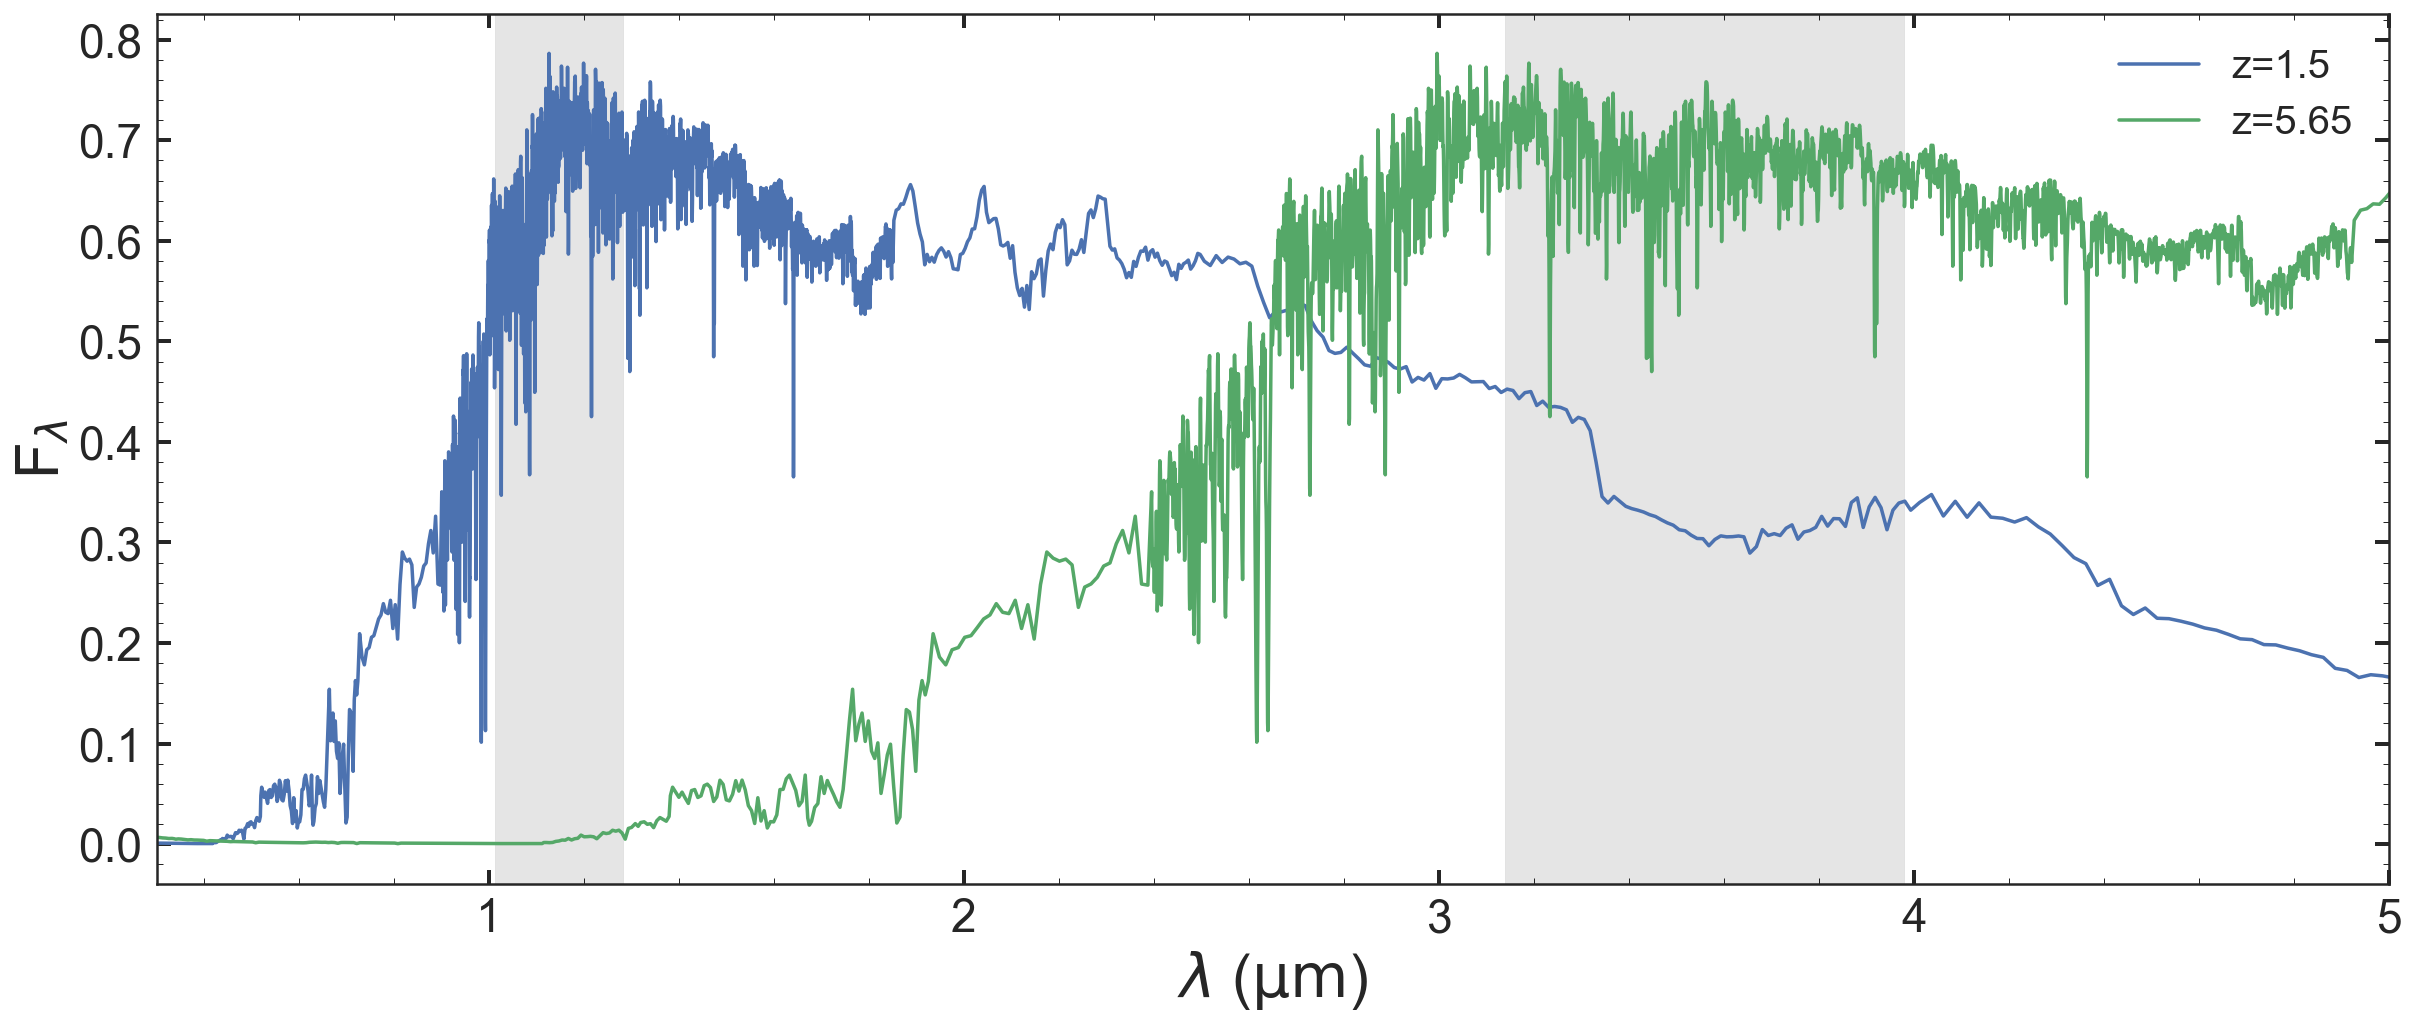

In [29]:
plt.figure(figsize=[20,8])
plt.plot(wv*(1+1.5)*1E-4,fl*1E4,label = 'z=1.5')
plt.plot(wv*(1+5.65)*1E-4,fl*1E4,label = 'z=5.65')
plt.axvspan(1.013, 1.282, color='k', alpha=.1)
plt.axvspan(3.14, 3.98, color='k', alpha=.1)
plt.xlim(.3,5)
plt.xlabel('$\lambda$ ($\\rm \mu m$)',fontsize=30)
plt.ylabel('F$_\lambda$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
# plt.text(.95,2.1,'F115W',fontsize=30)
# plt.text(3.3,2.1,'F356W',fontsize=30)

plt.savefig('spec.png',bbox_inches='tight')

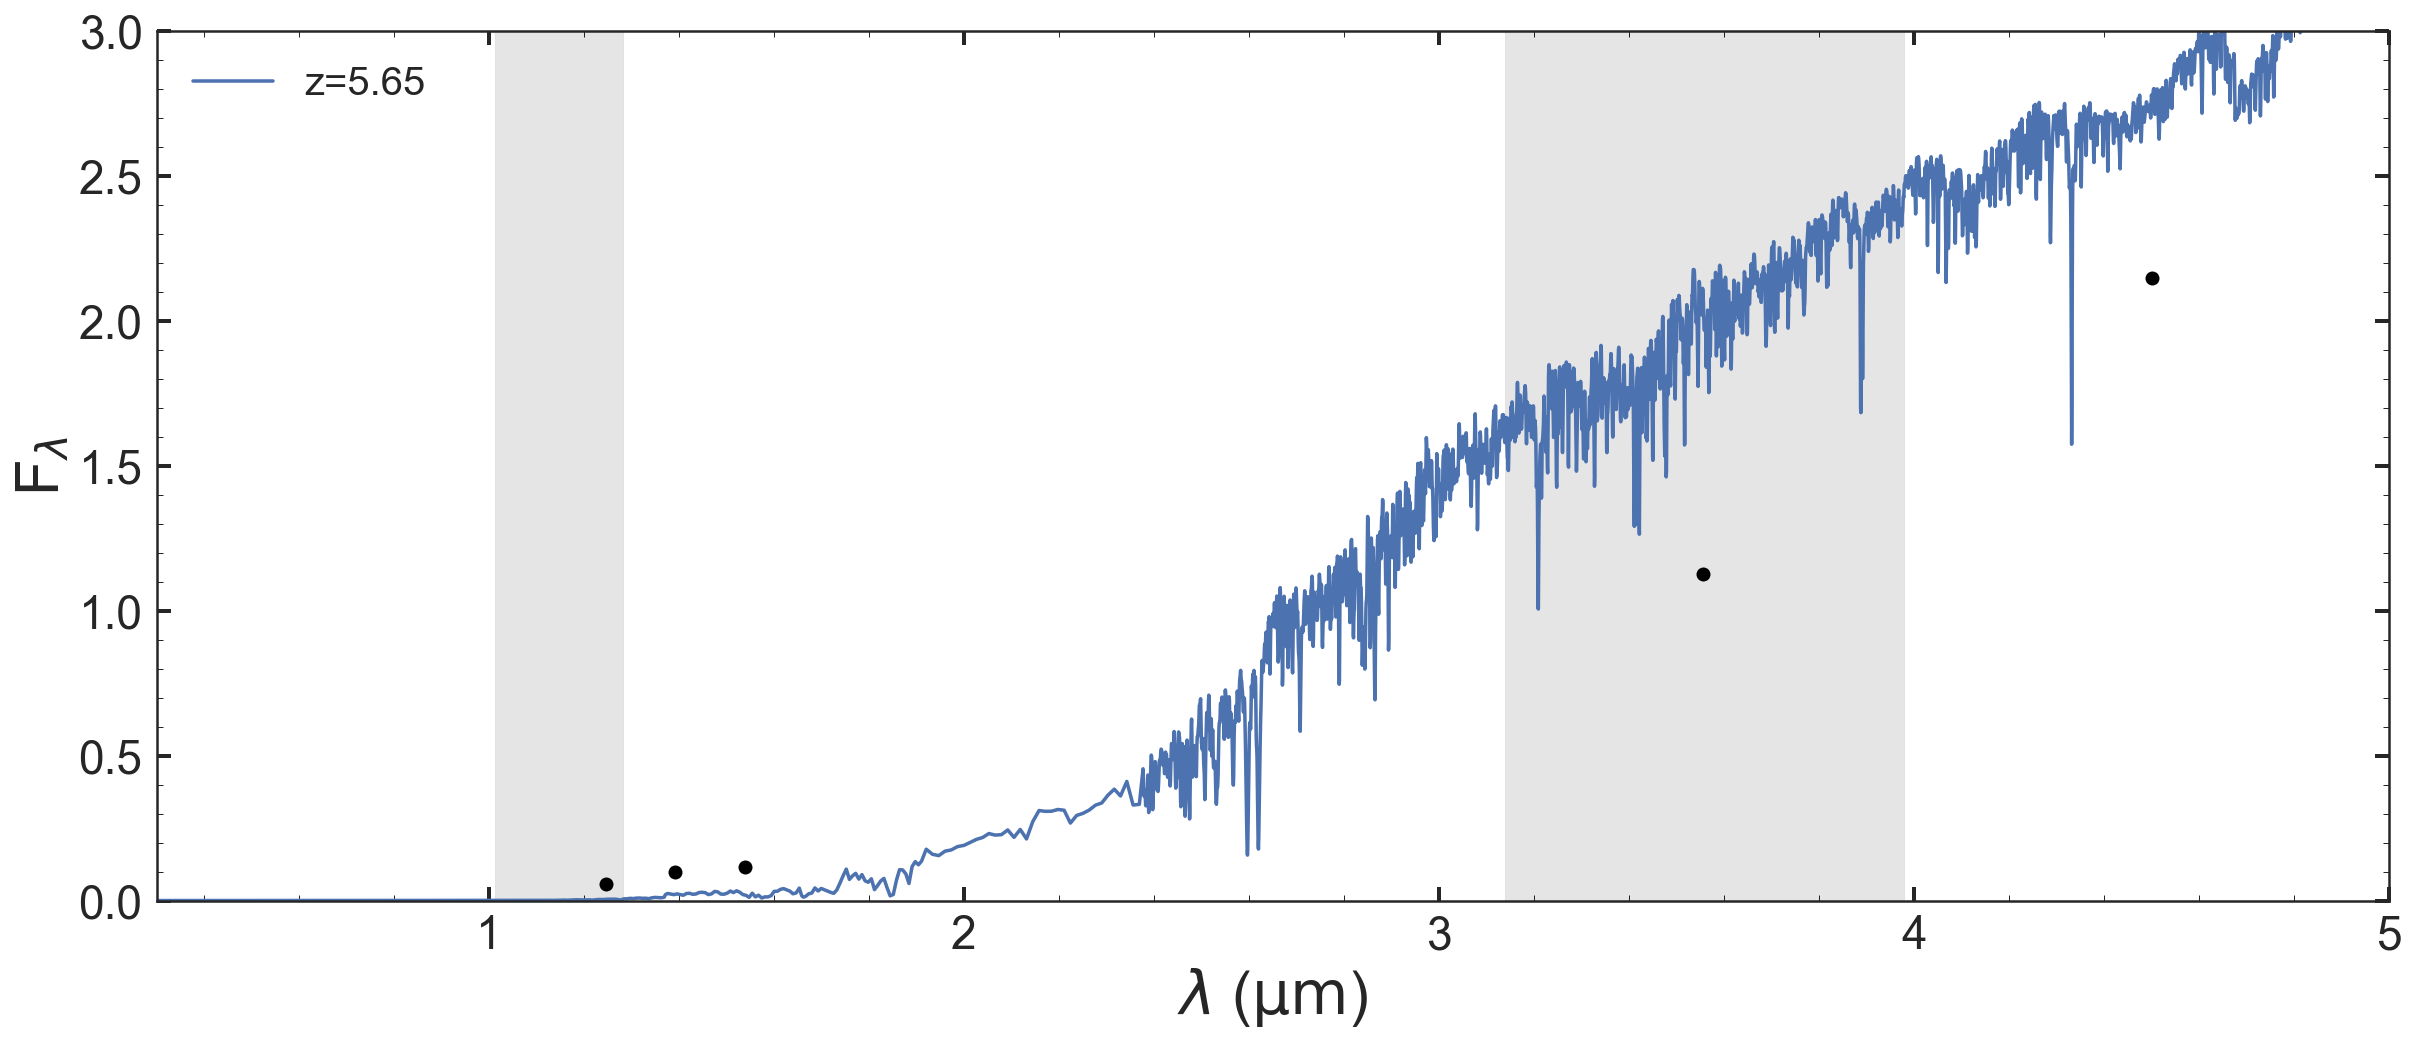

In [30]:
photwv = [1.2471, 1.3924, 1.5396, 3.5569, 4.5020]

plt.figure(figsize=[20,8])

plt.plot(wv*(1+5.6)*1E-4,wv**2/3E18*fl*3E15,label = 'z=5.65')
plt.plot(photwv[0],sampleDF['f125'][32043],'ko')
plt.plot(photwv[1],sampleDF['f140'][32043],'ko')
plt.plot(photwv[2],sampleDF['f160'][32043],'ko')
plt.plot(photwv[3],sampleDF['irac_1'][32043],'ko')
plt.plot(photwv[4],sampleDF['irac_2'][32043],'ko')

plt.axvspan(1.013, 1.282, color='k', alpha=.1)
plt.axvspan(3.14, 3.98, color='k', alpha=.1)
plt.xlim(.3,5)
plt.ylim(0,3)
plt.xlabel('$\lambda$ ($\\rm \mu m$)',fontsize=30)
plt.ylabel('F$_\lambda$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)


/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


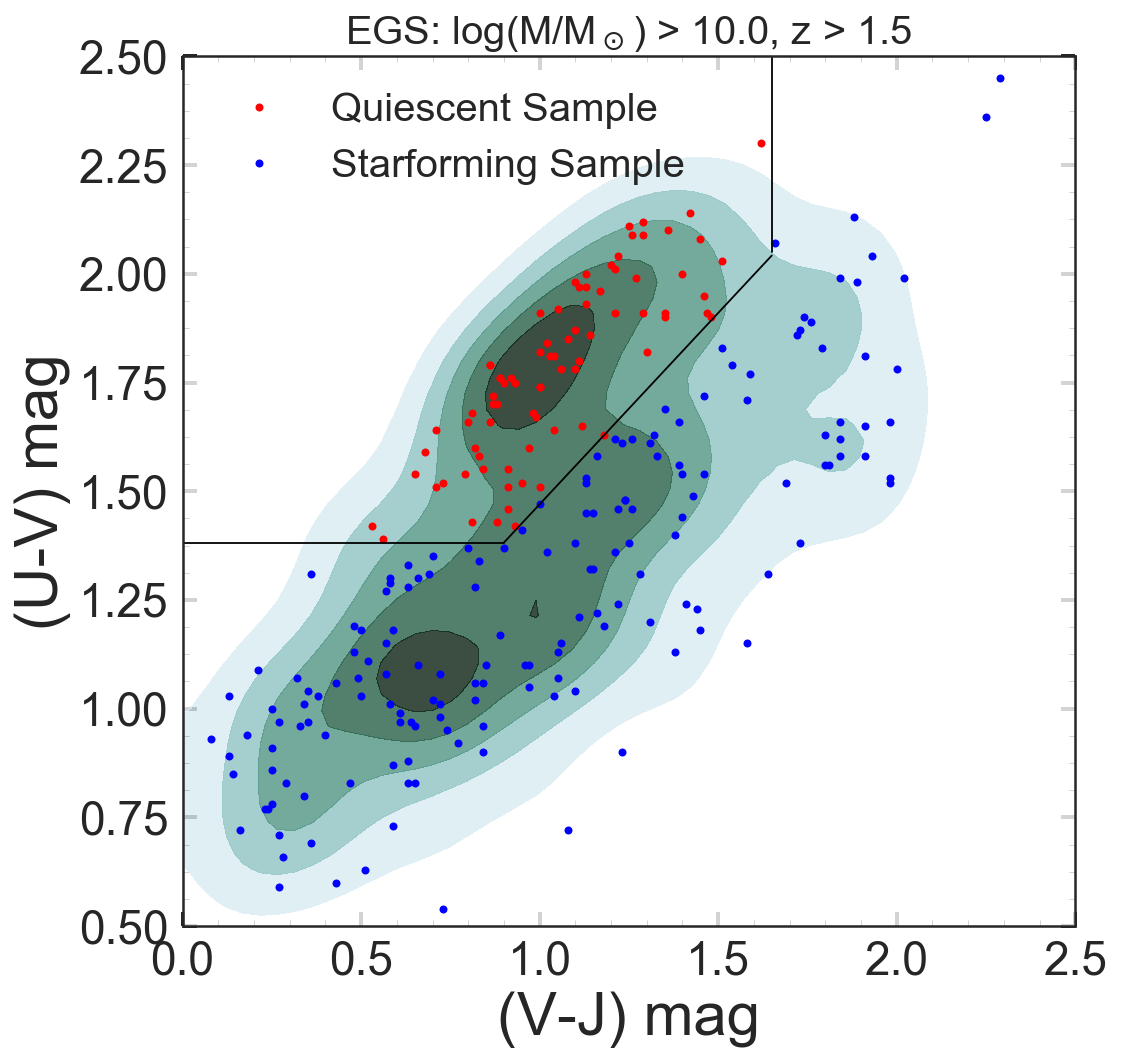

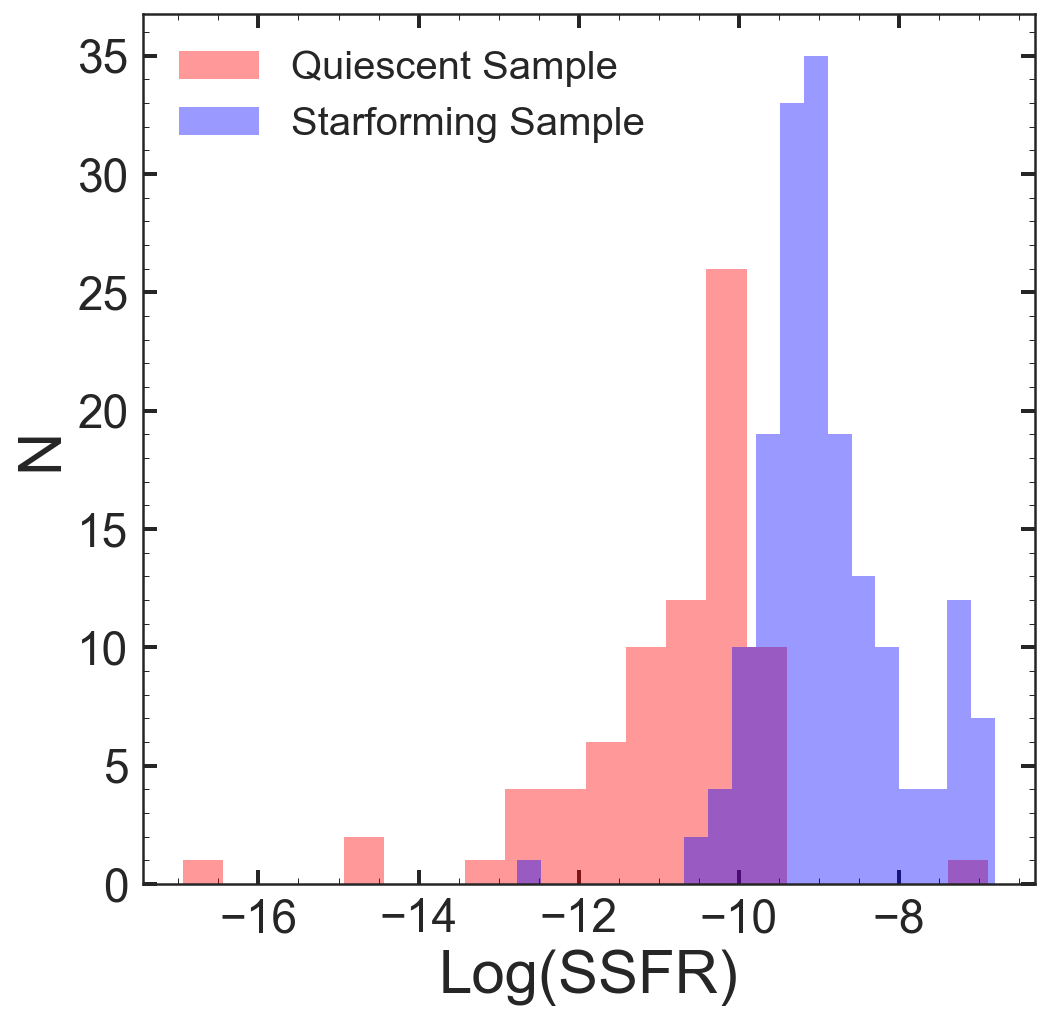

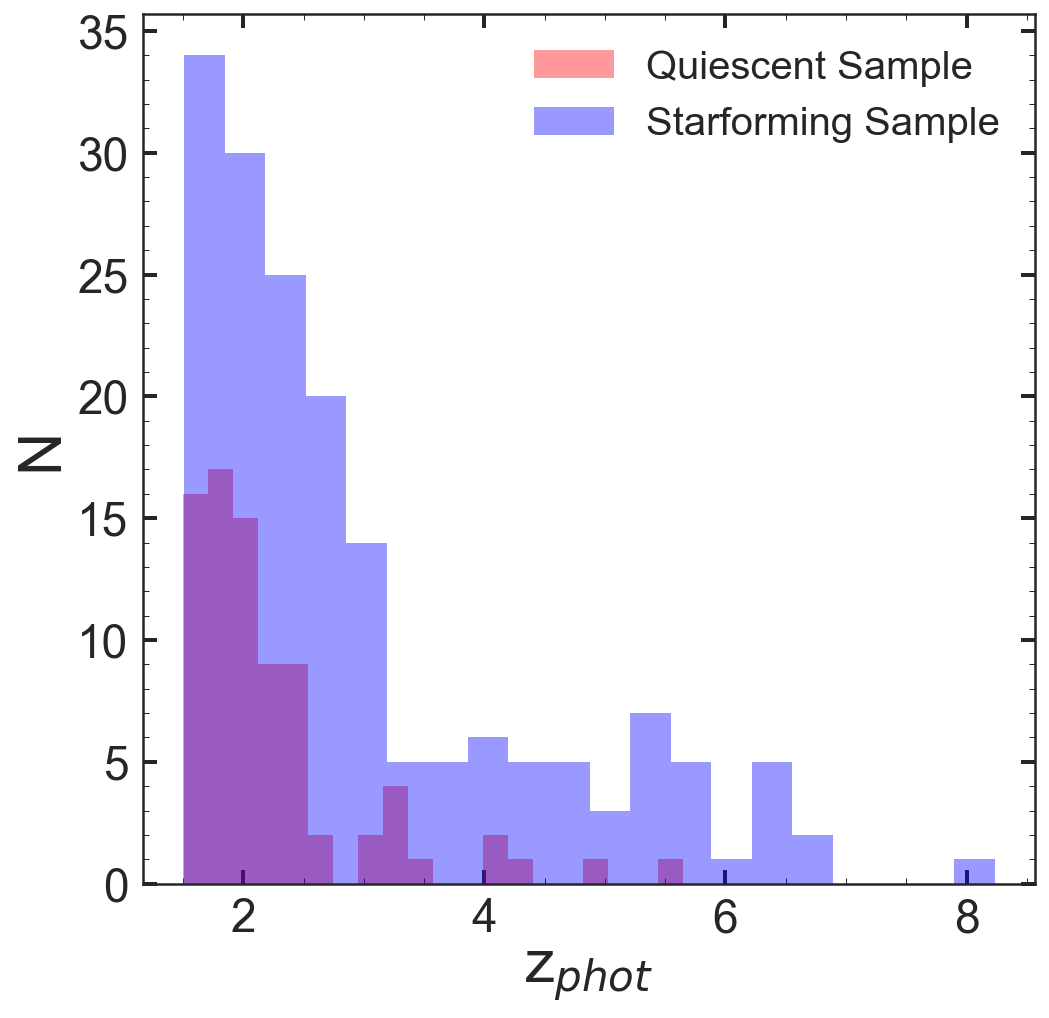

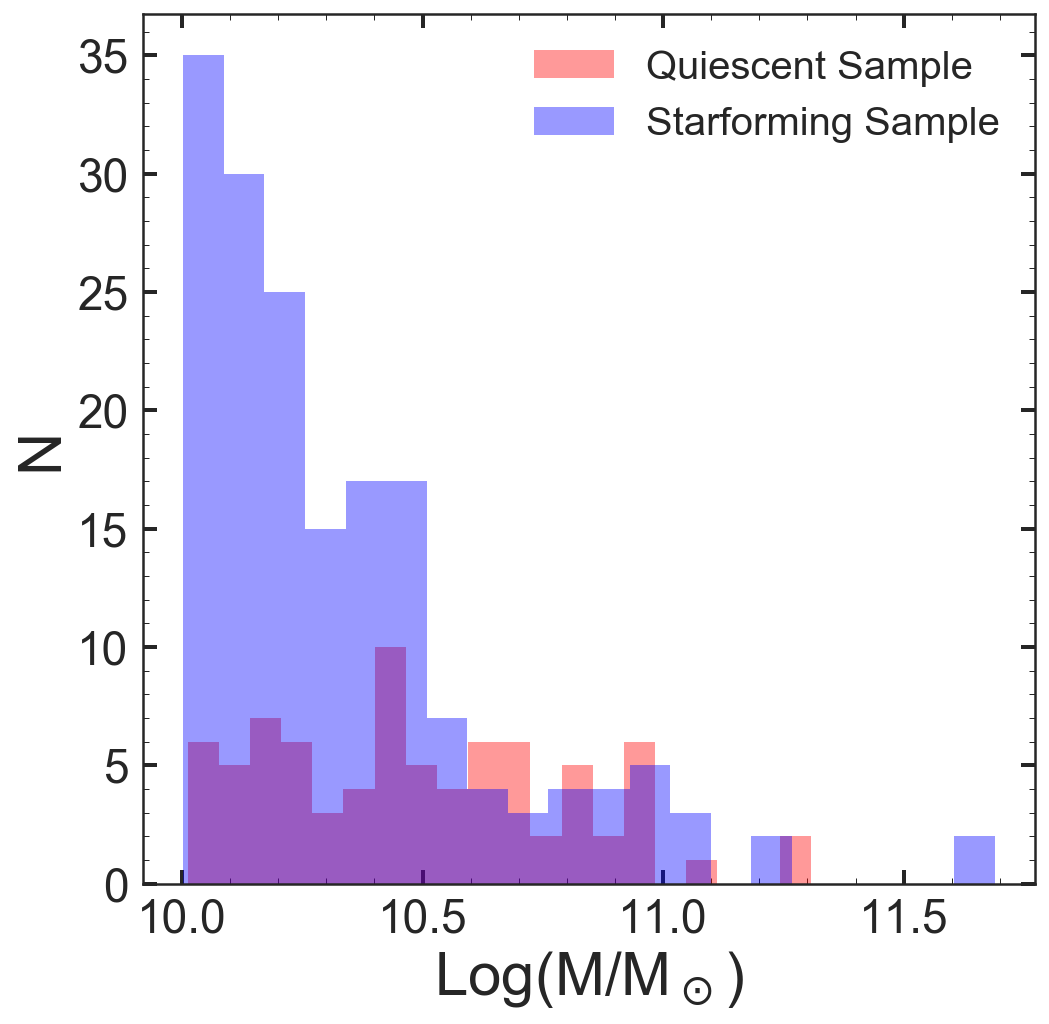

In [31]:
plt.figure(figsize=[8,8])
sea.kdeplot(uvjDF['v-j'],uvjDF['u-v'],n_levels = 7,alpha = .8,shade=True,cmap=cmap,kernel= 'epa',zorder=1,
            label='EGS: log(M/M$_\\odot$) > 10.0, z > 1.5')
plt.plot(sampleDF['v-j'],sampleDF['u-v'],'ro',ms=4,label='Quiescent Sample')
plt.plot(sf_sampleDF['v-j'],sf_sampleDF['u-v'],'bo',ms=4,label='Starforming Sample')
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.xlabel('(V-J) mag',fontsize=30)
plt.ylabel('(U-V) mag',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
plt.title('EGS: log(M/M$_\\odot$) > 10.0, z > 1.5',fontsize=20)
plt.savefig('uvj.png',bbox_inches='tight') 

################################

plt.figure(figsize=[8,8])
sea.distplot(np.log10(sampleDF['ssfr'].values)[np.log10(sampleDF['ssfr'].values) > -100],color='r',norm_hist=False,
             bins=20,kde=False,label='Quiescent Sample')
sea.distplot(np.log10(sf_sampleDF['ssfr'].values)[np.log10(sf_sampleDF['ssfr'].values) > -100],color='b',norm_hist=False,
             bins=20,kde=False,label='Starforming Sample')
plt.xlabel('Log(SSFR)',fontsize=30)
plt.ylabel('N',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
plt.savefig('ssfr.png',bbox_inches='tight') 

################################

plt.figure(figsize=[8,8])
sea.distplot(sampleDF['photz'],color='r',norm_hist=False,bins=20,kde=False,label='Quiescent Sample')
sea.distplot(sf_sampleDF['photz'],color='b',norm_hist=False,bins=20,kde=False,label='Starforming Sample')
plt.xlabel('z$_{phot}$',fontsize=30)
plt.ylabel('N',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
plt.savefig('photz.png',bbox_inches='tight')

################################

plt.figure(figsize=[8,8])
sea.distplot(sampleDF['lmass'],color='r',norm_hist=False,bins=20,kde=False,label='Quiescent Sample')
sea.distplot(sf_sampleDF['lmass'],color='b',norm_hist=False,bins=20,kde=False,label='Starforming Sample')
plt.xlabel('Log(M/M$_\\odot$)',fontsize=30)
plt.ylabel('N',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
plt.savefig('lmass.png',bbox_inches='tight')

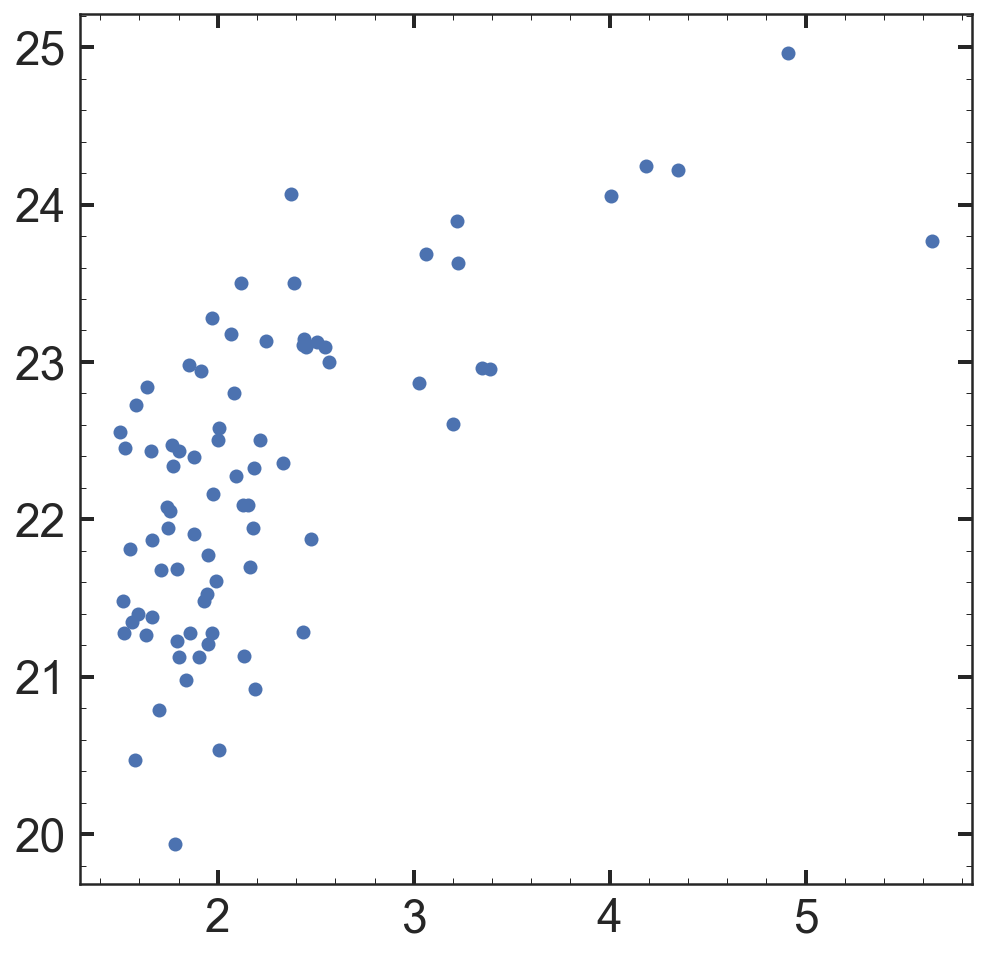

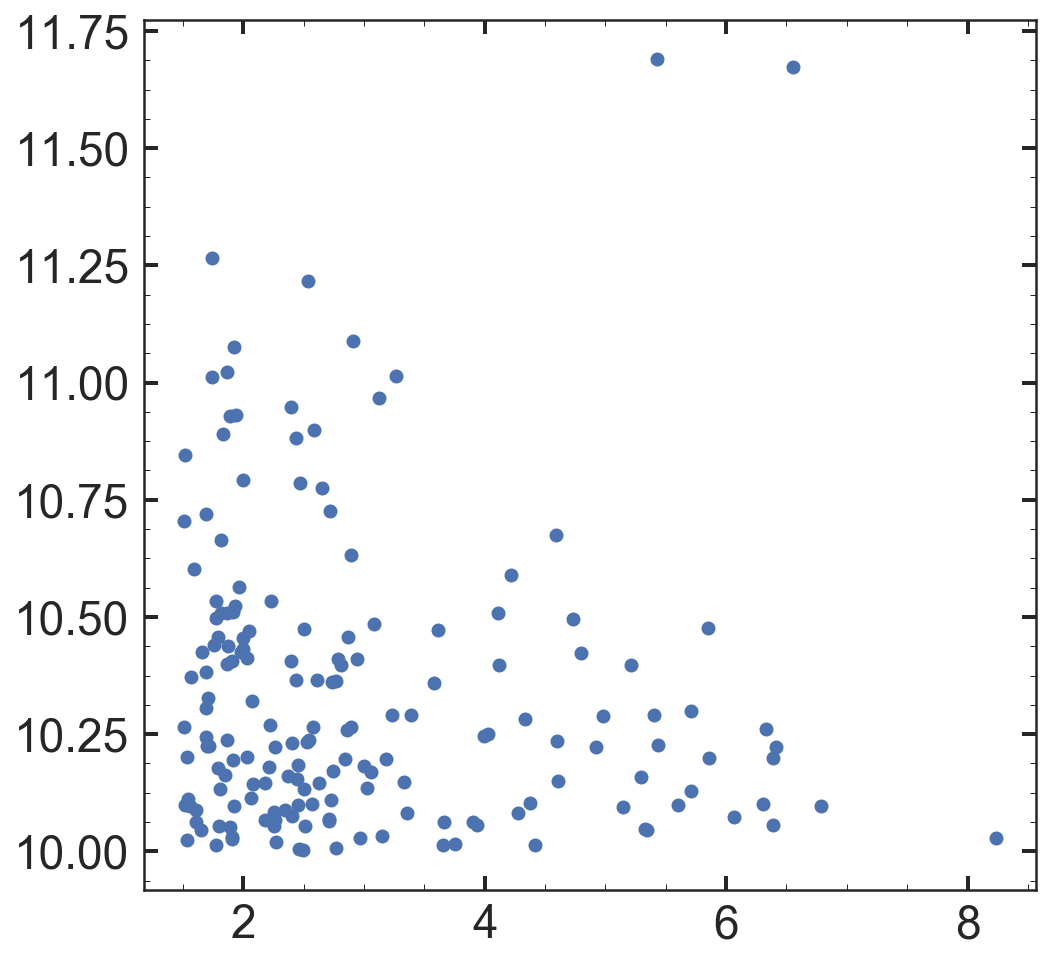

In [32]:
plt.figure(figsize=[8,8])
plt.plot(sampleDF['photz'],-2.5*np.log10(sampleDF['irac_1']*1E-29) - 48.6,'o')
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)


plt.figure(figsize=[8,8])
plt.plot(sf_sampleDF['photz'],sf_sampleDF['lmass'],'o')
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)

In [81]:
sampleDF[sampleDF.photz > 4]

,class_star,dec,f125,f140,f160,id,irac_1,irac_2,j,lmass,photz,ra,ssfr,u,u-v,v,v-j,SF,inout
32043,0.00,52.924858,0.057595,0.098348,0.116771,32044,1.126889,2.147021,-23.54,10.8751,5.645,215.101910,9.603143e-11,-21.59,1.39,-22.98,0.56,q,in
34307,0.77,52.882581,0.002568,0.048642,0.072664,34308,0.865422,0.810888,-22.37,10.2936,4.005,214.981389,9.104436e-12,-19.80,1.70,-21.50,0.87,q,in
35007,0.74,52.874449,0.014970,0.025658,0.006864,35008,0.376366,0.312892,-21.71,10.0171,4.911,214.951803,3.265845e-11,-19.06,1.79,-20.85,0.86,q,in
35688,0.46,52.984843,0.014390,-99.000000,0.077870,35689,0.744263,0.576454,-21.97,10.1521,4.351,215.091232,6.027966e-11,-20.02,1.42,-21.44,0.53,q,in
38036,0.43,52.875158,-0.004420,0.013697,0.044983,38037,0.726586,0.778471,-22.23,10.2569,4.187,214.879016,1.289603e-07,-19.42,1.63,-21.05,1.18,q,in


# Nirspec select

In [33]:
nirspec_box = [[[14,20,38.36], [52,57,11.8]],[[14,20,38.33], [52,58,47.0]],[[14,20,28.95], [52,58,46.7]],[[14,20,28.99], [52,57,12.5]],
[[14,20,38.28], [52,59,11.7]], [[14,20,38.20], [53, 0,46.8]], [[14,20,28.92], [53, 0,46.5]], [[14,20,28.84], [52,59,11.4]],
[[14,20,24.77], [52,59,10.4]], [[14,20,24.79], [53, 0,45.6]], [[14,20,15.62], [53, 0,43.2]], [[14,20,15.55], [52,59,10.0]],
[[14,20,24.91], [52,57,13.6]], [[14,20,24.65], [52,58,46.7]], [[14,20,15.66], [52,58,45.3]], [[14,20,15.65], [52,57,11.7]],
[[14,20,21.12], [52,57,31.3]], [[14,20,21.02], [52,59,05.9]], [[14,20,11.64], [52,59,06.0]], [[14,20,11.80], [52,57,29.3]],
[[14,20,21.03], [52,59,28.1]], [[14,20,21.10], [53, 1,04.2]], [[14,20,11.54], [53, 1,04.3]], [[14,20,11.70], [52,59,29.7]],
[[14,20,07.51], [52,59,29.7]], [[14,20,07.41], [53, 1,03.4]], [[14,19,58.18], [53, 1,01.4]], [[14,19,58.46], [52,59,27.7]],
[[14,20,07.55], [52,57,28.9]], [[14,20,07.62], [52,59,05.0]], [[14,19,58.46], [52,59,04.6]], [[14,19,58.40], [52,57,29.9]],
[[14,20,16.12], [52,53,25.6]], [[14,20,16.13], [52,55,01.8]], [[14,20,06.65], [52,55,00.3]], [[14,20,06.81], [52,53,25.2]],
[[14,20,16.13], [52,55,24.9]], [[14,20,16.09], [52,56,59.6]], [[14,20,06.66], [52,56,58.2]], [[14,20,06.76], [52,55,23.0]],
[[14,20,02.41], [52,55,23.5]], [[14,20,02.47], [52,56,58.7]], [[14,19,53.27], [52,56,56.2]], [[14,19,53.43], [52,55,22.5]],
[[14,20,02.74], [52,53,23.7]], [[14,20,02.52], [52,54,59.3]], [[14,19,53.32], [52,54,59.9]], [[14,19,53.55], [52,53,25.2]],
[[14,19,58.84], [52,53,44.8]], [[14,19,58.84], [52,55,20.0]], [[14,19,49.36], [52,55,21.0]], [[14,19,49.59], [52,53,44.3]],
[[14,19,58.96], [52,55,44.2]], [[14,19,58.79], [52,57,19.8]], [[14,19,49.25], [52,57,19.3]], [[14,19,49.47], [52,55,42.6]],
[[14,19,45.29], [52,55,44.6]], [[14,19,45.34], [52,57,19.3]], [[14,19,36.02], [52,57,16.7]], [[14,19,35.97], [52,55,43.5]],
[[14,19,45.57], [52,53,44.8]], [[14,19,45.40], [52,55,19.5]], [[14,19,36.26], [52,55,19.9]], [[14,19,36.32], [52,53,45.2]],
[[14,19,54.10], [52,49,42.2]], [[14,19,54.05], [52,51,17.3]], [[14,19,44.58], [52,51,16.3]], [[14,19,44.75], [52,49,41.1]],
[[14,19,53.99], [52,51,41.0]], [[14,19,53.88], [52,53,16.1]], [[14,19,44.57], [52,53,15.1]], [[14,19,44.58], [52,51,41.4]],
[[14,19,40.46], [52,51,39.9]], [[14,19,40.39], [52,53,15.0]], [[14,19,31.20], [52,53,12.9]], [[14,19,31.38], [52,51,38.3]],
[[14,19,40.69], [52,49,41.1]], [[14,19,40.52], [52,51,15.2]], [[14,19,31.38], [52,51,14.6]], [[14,19,31.45], [52,49,40.5]],
[[14,19,36.85], [52,49,55.1]], [[14,19,36.56], [52,51,30.8]], [[14,19,27.20], [52,51,29.1]], [[14,19,27.39], [52,49,54.0]],
[[14,19,36.56], [52,51,52.9]], [[14,19,36.49], [52,53,30.1]], [[14,19,27.13], [52,53,28.0]], [[14,19,27.31], [52,51,52.8]],
[[14,19,23.08], [52,51,53.2]], [[14,19,23.00], [52,53,28.4]], [[14,19,13.86], [52,53,25.2]], [[14,19,13.94], [52,51,51.5]],
[[14,19,23.21], [52,49,53.4]], [[14,19,23.25], [52,51,30.1]], [[14,19,14.06], [52,51,28.9]], [[14,19,14.14], [52,49,53.2]]]

In [36]:
len(nirspec_box)/4

24

In [34]:
NBOX = []
for i in range(len(nirspec_box)):
    ra,dec = ra_dec_convert(nirspec_box[i][0],nirspec_box[i][1])
    NBOX.append([ra,dec])

In [66]:
Nq_inout = np.repeat('out',len(qDF.index))
Ns_inout = np.repeat('out',len(sDF.index))
for i in range(24):
    param1 = np.polyfit([NBOX[0 + i*4][0],NBOX[1 + i*4][0]],[NBOX[0 + i*4][1],NBOX[1 + i*4][1]],1)
    param2 = np.polyfit([NBOX[1 + i*4][0],NBOX[2 + i*4][0]],[NBOX[1 + i*4][1],NBOX[2 + i*4][1]],1)
    param3 = np.polyfit([NBOX[2 + i*4][0],NBOX[3 + i*4][0]],[NBOX[2 + i*4][1],NBOX[3 + i*4][1]],1)
    param4 = np.polyfit([NBOX[3 + i*4][0],NBOX[0 + i*4][0]],[NBOX[3 + i*4][1],NBOX[0 + i*4][1]],1)

    for ii in range(len(qDF.index)):
        if qDF['dec'].values[ii] < param2[0]*qDF['ra'].values[ii] + param2[1] \
        and qDF['dec'].values[ii] > param4[0]*qDF['ra'].values[ii] + param4[1] \
        and qDF['ra'].values[ii] < NBOX[0 + i*4][0] and qDF['ra'].values[ii] > NBOX[3 + i*4][0]:
            Nq_inout[ii] = 'in'
            
    for ii in range(len(sDF.index)):
        if sDF['dec'].values[ii] < param2[0]*sDF['ra'].values[ii] + param2[1] \
        and sDF['dec'].values[ii] > param4[0]*sDF['ra'].values[ii] + param4[1]\
        and sDF['ra'].values[ii] < NBOX[0 + i*4][0] and sDF['ra'].values[ii] > NBOX[3 + i*4][0]:

            Ns_inout[ii] = 'in'

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


In [67]:
qDF['NIRSPECinout'] = Nq_inout
sDF['NIRSPECinout'] = Ns_inout

NsampleDF = qDF[qDF.NIRSPECinout == 'in']
Nsf_sampleDF = sDF[sDF.NIRSPECinout == 'in']

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


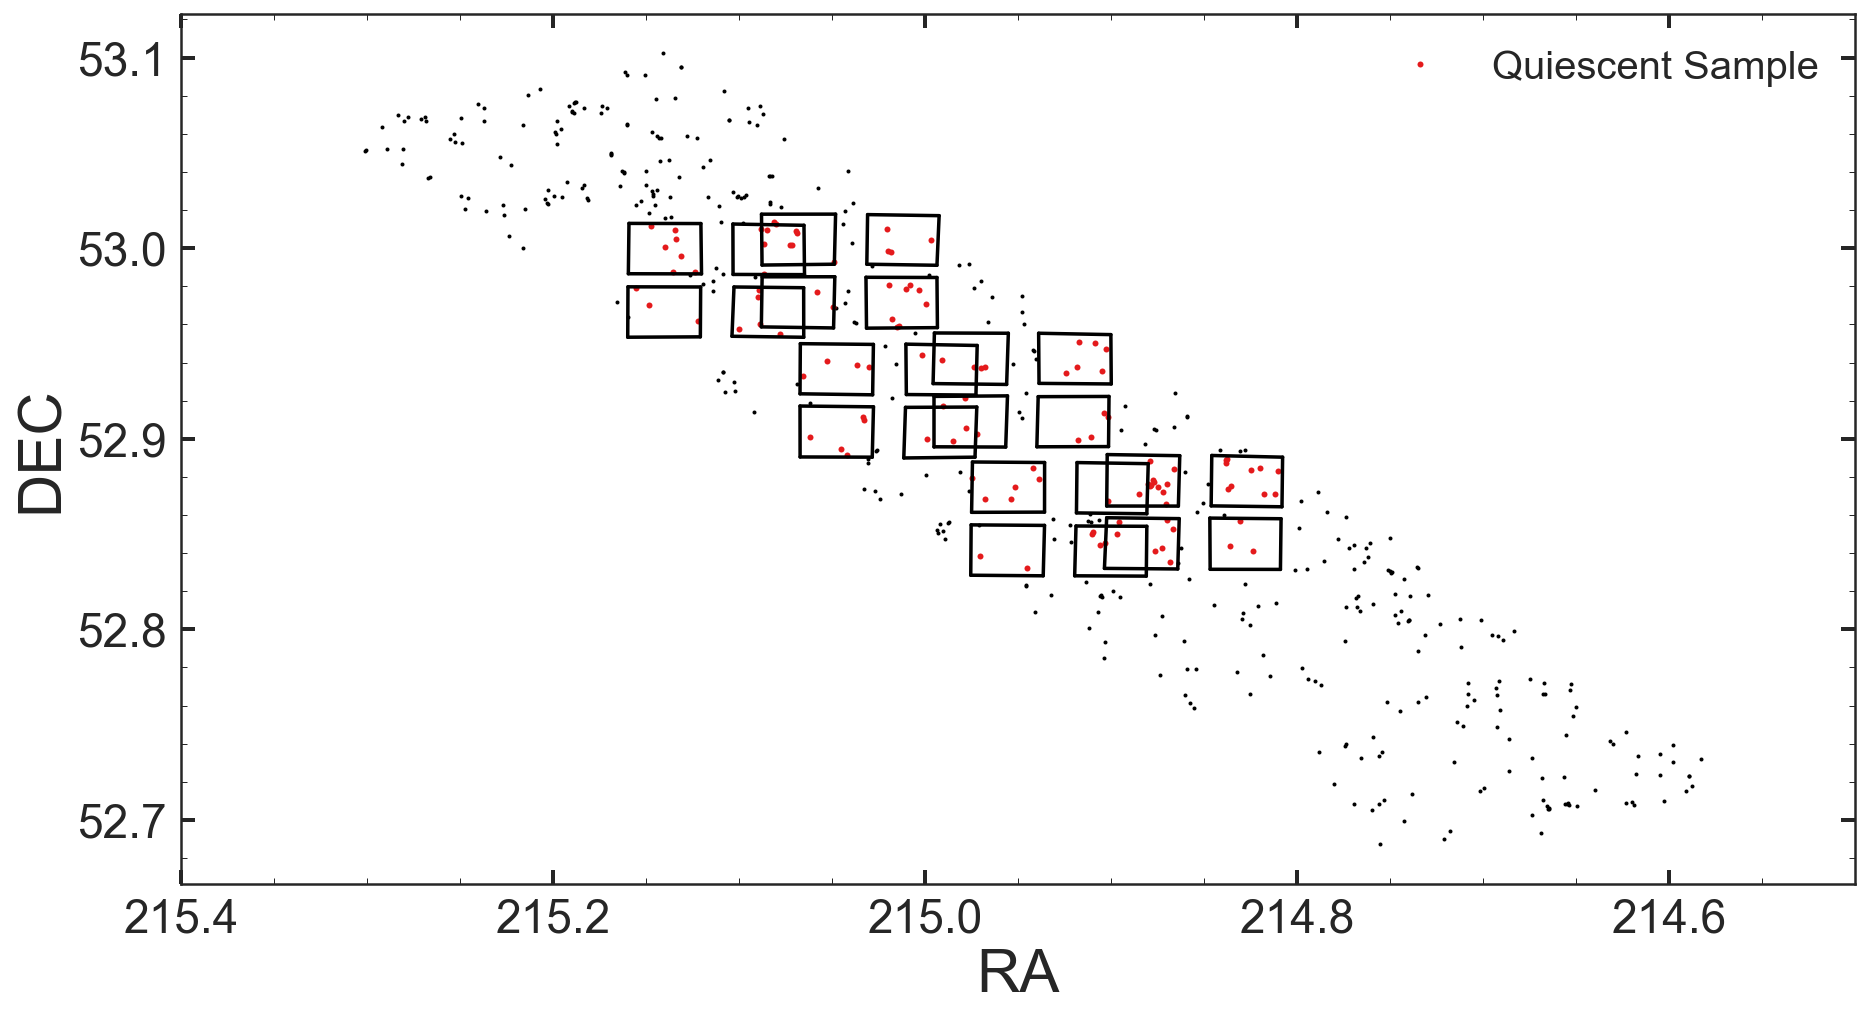

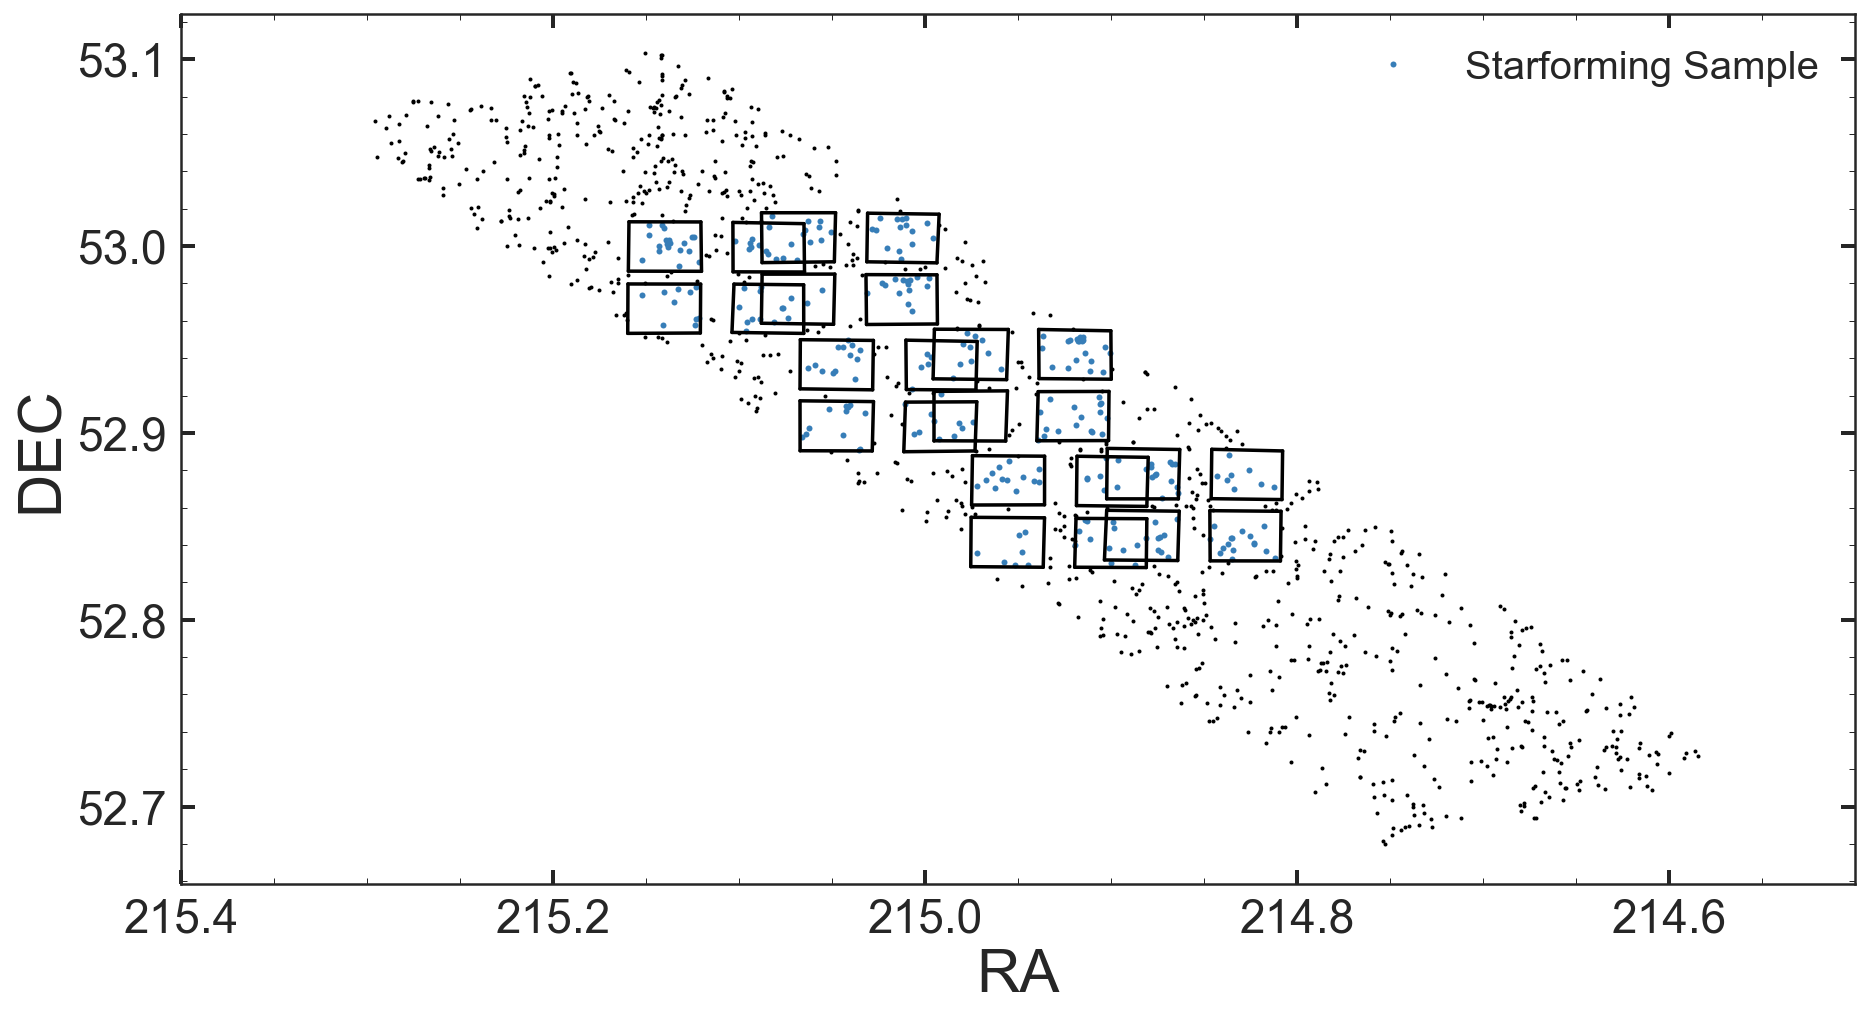

In [73]:
fig2 = plt.figure(figsize=[15,8])
plt.plot(qDF['ra'].values, qDF['dec'].values ,'ko',ms=2)
plt.plot(NsampleDF['ra'], NsampleDF['dec'] ,'o',color='#e41a1c',ms=3,label='Quiescent Sample')

u=1
for i in range(len(NBOX)):
    if u == 4:
        plt.plot([NBOX[i][0],NBOX[i-3][0]],[NBOX[i][1],NBOX[i-3][1]],'k')
        u=1
    else:
        plt.plot([NBOX[i][0],NBOX[i+1][0]],[NBOX[i][1],NBOX[i+1][1]],'k')
        u+=1

plt.xlabel('RA',fontsize=30)
plt.ylabel('DEC',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
plt.xlim(215.4,214.5)
# plt.savefig('field.png',bbox_inches='tight') 

#####################################################

fig2 = plt.figure(figsize=[15,8])
plt.plot(sDF['ra'].values, sDF['dec'].values ,'ko',ms=2)
plt.plot(Nsf_sampleDF['ra'], Nsf_sampleDF['dec'] ,'o',color='#377eb8',ms=3,label='Starforming Sample')


u=1
for i in range(len(NBOX)):
    if u == 4:
        plt.plot([NBOX[i][0],NBOX[i-3][0]],[NBOX[i][1],NBOX[i-3][1]],'k')
        u=1
    else:
        plt.plot([NBOX[i][0],NBOX[i+1][0]],[NBOX[i][1],NBOX[i+1][1]],'k')
        u+=1

plt.xlabel('RA',fontsize=30)
plt.ylabel('DEC',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.xlim(215.4,214.5)
plt.legend(fontsize=20)
# plt.savefig('sf_field.png',bbox_inches='tight')

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


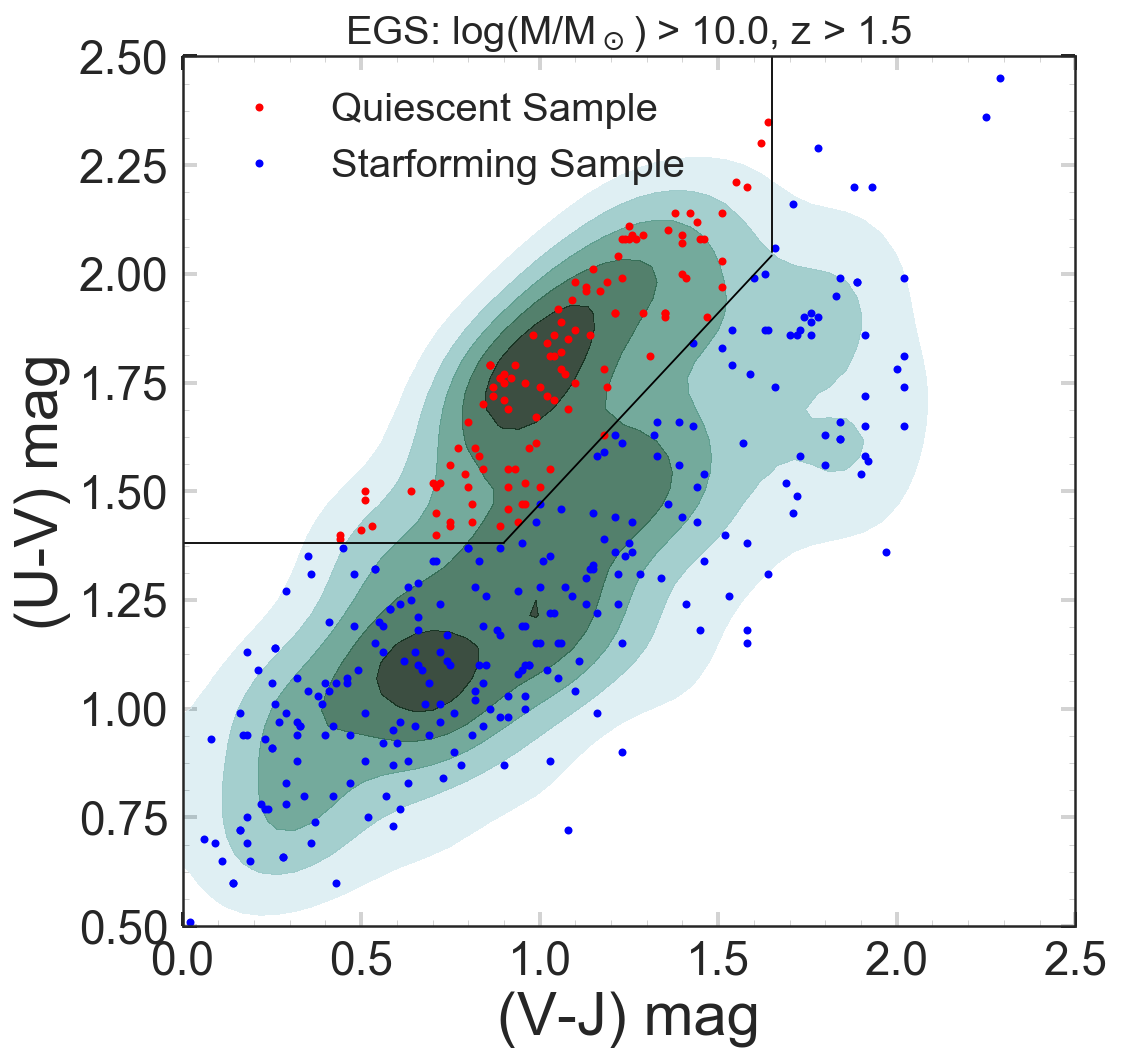

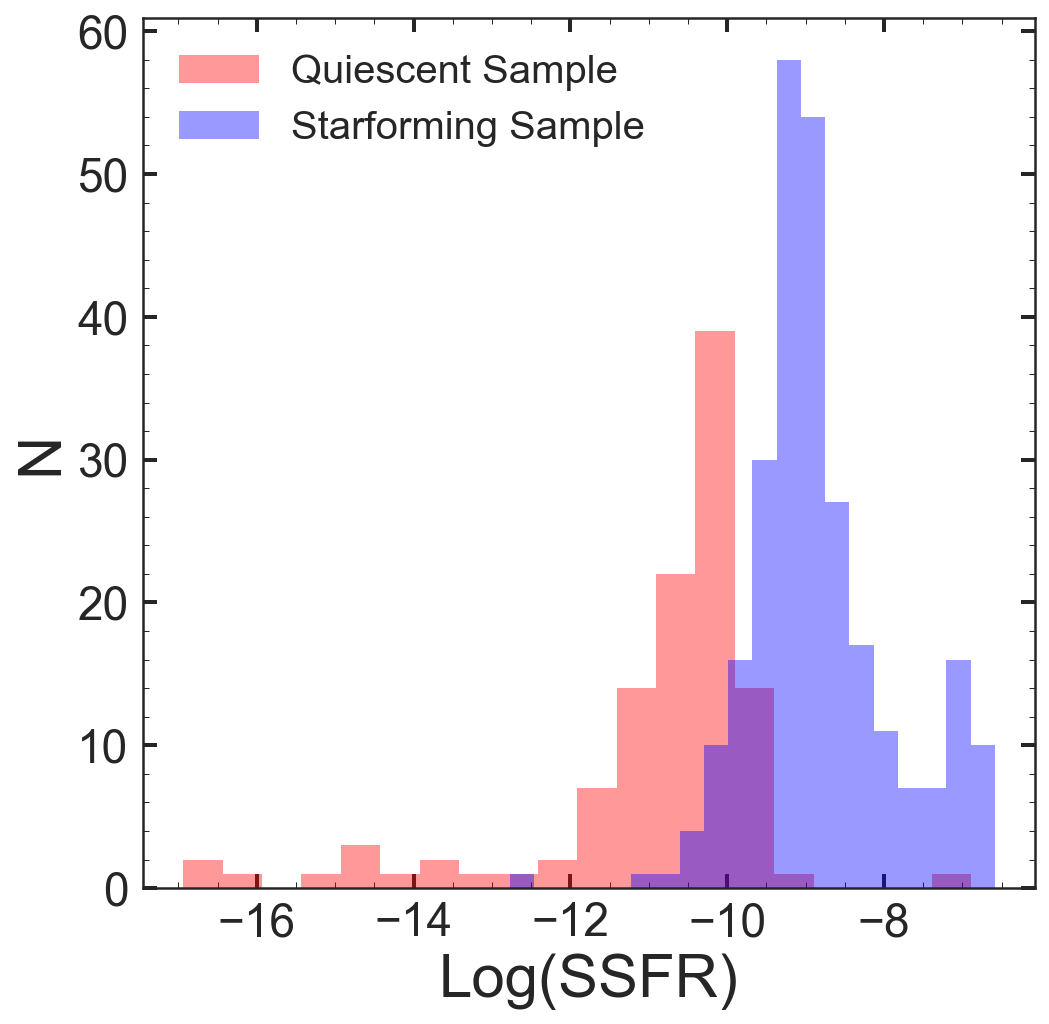

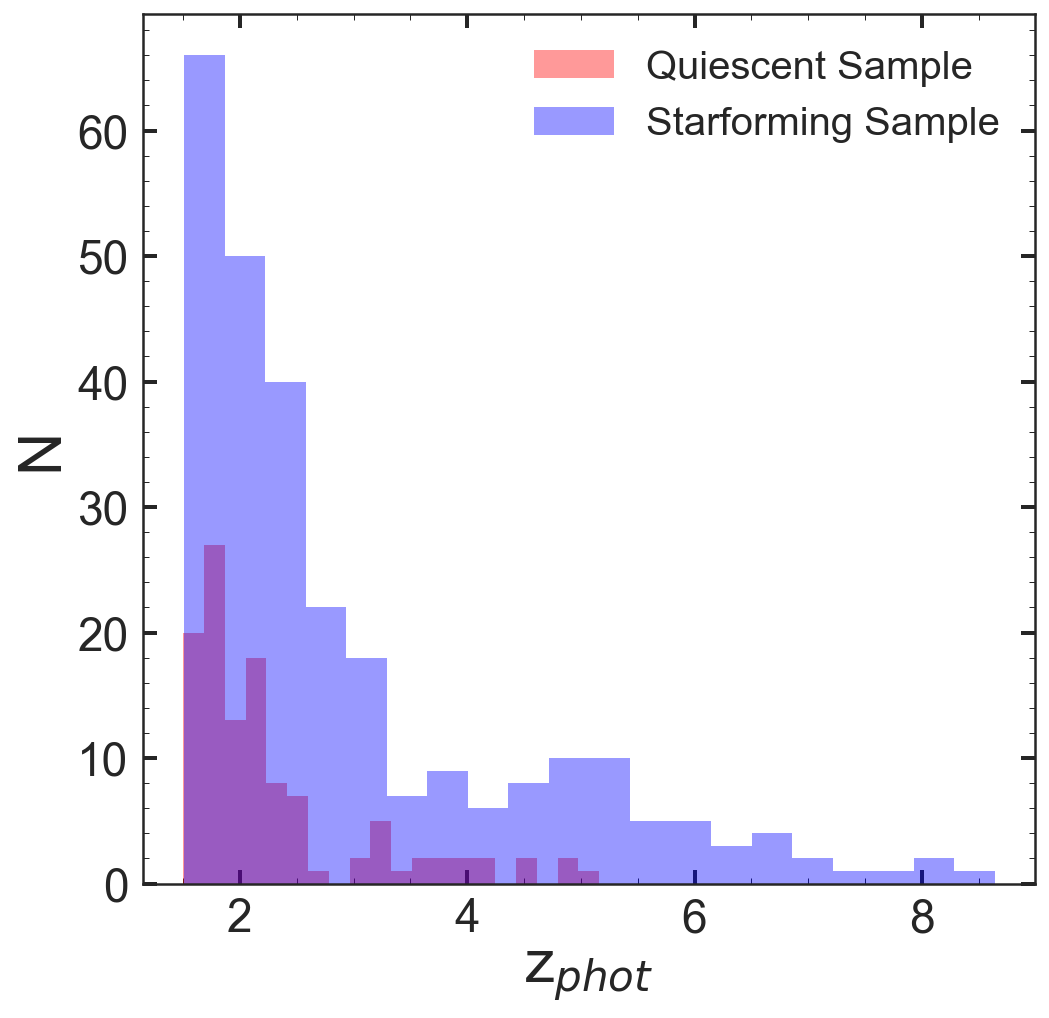

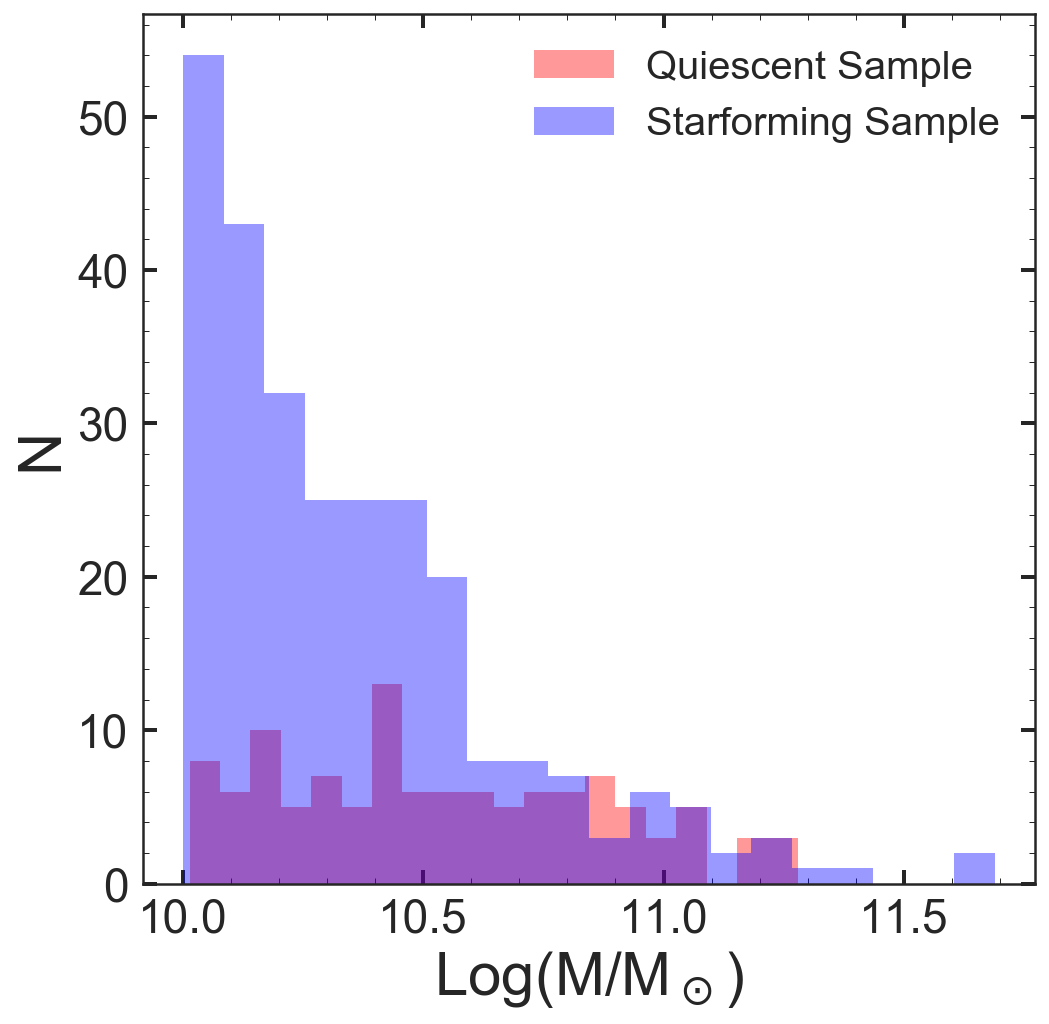

In [75]:
plt.figure(figsize=[8,8])
sea.kdeplot(uvjDF['v-j'],uvjDF['u-v'],n_levels = 7,alpha = .8,shade=True,cmap=cmap,kernel= 'epa',zorder=1,
            label='EGS: log(M/M$_\\odot$) > 10.0, z > 1.5')
plt.plot(NsampleDF['v-j'],NsampleDF['u-v'],'ro',ms=4,label='Quiescent Sample')
plt.plot(Nsf_sampleDF['v-j'],Nsf_sampleDF['u-v'],'bo',ms=4,label='Starforming Sample')
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.xlabel('(V-J) mag',fontsize=30)
plt.ylabel('(U-V) mag',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
plt.title('EGS: log(M/M$_\\odot$) > 10.0, z > 1.5',fontsize=20)
# plt.savefig('uvj.png',bbox_inches='tight') 

################################

plt.figure(figsize=[8,8])
sea.distplot(np.log10(NsampleDF['ssfr'].values)[np.log10(NsampleDF['ssfr'].values) > -100],color='r',norm_hist=False,
             bins=20,kde=False,label='Quiescent Sample')
sea.distplot(np.log10(Nsf_sampleDF['ssfr'].values)[np.log10(Nsf_sampleDF['ssfr'].values) > -100],color='b',norm_hist=False,
             bins=20,kde=False,label='Starforming Sample')
plt.xlabel('Log(SSFR)',fontsize=30)
plt.ylabel('N',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
# plt.savefig('ssfr.png',bbox_inches='tight') 

################################

plt.figure(figsize=[8,8])
sea.distplot(NsampleDF['photz'],color='r',norm_hist=False,bins=20,kde=False,label='Quiescent Sample')
sea.distplot(Nsf_sampleDF['photz'],color='b',norm_hist=False,bins=20,kde=False,label='Starforming Sample')
plt.xlabel('z$_{phot}$',fontsize=30)
plt.ylabel('N',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
# plt.savefig('photz.png',bbox_inches='tight')

################################

plt.figure(figsize=[8,8])
sea.distplot(NsampleDF['lmass'],color='r',norm_hist=False,bins=20,kde=False,label='Quiescent Sample')
sea.distplot(Nsf_sampleDF['lmass'],color='b',norm_hist=False,bins=20,kde=False,label='Starforming Sample')
plt.xlabel('Log(M/M$_\\odot$)',fontsize=30)
plt.ylabel('N',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.legend(fontsize=20)
# plt.savefig('lmass.png',bbox_inches='tight')

In [78]:
len(NsampleDF),len(Nsf_sampleDF)

(115, 270)

In [80]:
NsampleDF[NsampleDF.photz > 4].photz

6535     4.015
8293     4.515
27258    4.495
29518    4.960
35007    4.911
35300    4.123
38036    4.187
38177    5.162
Name: photz, dtype: float64